In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import graphviz
from networkx.drawing.nx_agraph import graphviz_layout
from functools import reduce

import networkx as nx
import operator

from matplotlib.lines import Line2D
from sklearn.preprocessing import MinMaxScaler
from networkx.algorithms import tree

pd.set_option('display.max_rows', 300) # specifies number of rows to show
#pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [8]:
# Save data for a specific quarter to a CSV file
key =  "Q2"

# Read data from the CSV file
selected_quarter = pd.read_csv('Quarters_Adj_Matrices/'+ key +'_logret.csv', index_col=0)
selected_quarter.head()


,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAPL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABBV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Create edge-list (only keep values in the upper triangle)
links = selected_quarter.where(np.triu(np.ones(selected_quarter.shape)).astype(bool))
links = links.stack().reset_index()
links.columns = ['stock1', 'stock2','value']
links['value'] = links['value'].astype(int)
links.head(10)

,stock1,stock2,value
0,A,A,0
1,A,AAL,0
2,A,AAP,0
3,A,AAPL,0
4,A,ABBV,0
5,A,ABC,0
6,A,ABT,1
7,A,ACGL,0
8,A,ACN,0
9,A,ADBE,0


In [14]:
# Only keep stocks with edges=1
links_filtered = links.loc[(links['value'] == 1)]
conn_nodes = links_filtered.groupby('stock1').count()
print('Number of connected nodes:', len(conn_nodes), 
      '\nNumber of edges:', links_filtered['value'].count())
links_filtered.head(10)

Number of connected nodes: 306 
Number of edges: 2042


,stock1,stock2,value
6,A,ABT,1
112,A,CRL,1
133,A,DHR,1
367,A,PKI,1
436,A,TMO,1
623,AAL,DAL,1
778,AAL,LUV,1
948,AAL,UAL,1
1044,AAP,AZO,1
1231,AAP,INTU,1


/var/folders/j7/152m7hqd3pg_1qx71y_nsnk80000gn/T/ipykernel_17298/224687225.py:12: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G)


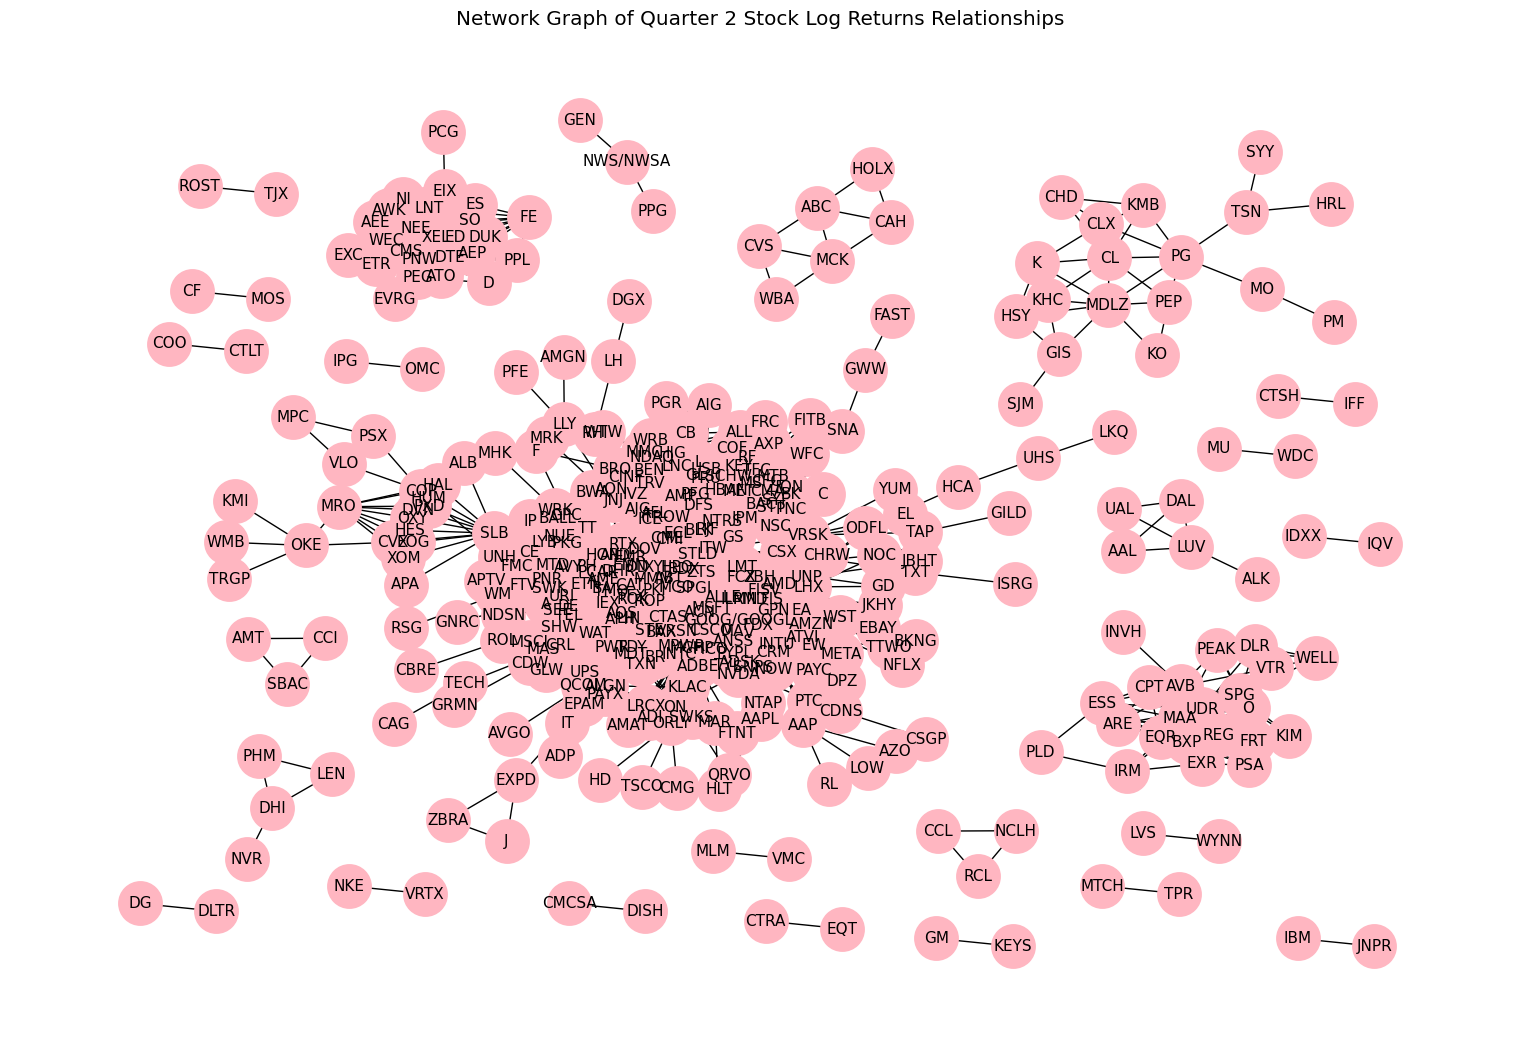

In [30]:
#import pygraphviz
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

# Draw network graph
G = nx.from_pandas_edgelist(links_filtered, 'stock1', 'stock2')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10

pos = graphviz_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_color='lightpink', node_size=800, edge_color='black', linewidths=4, font_size=11)

# Add title and labels
plt.title("Network Graph of Quarter 2 Stock Log Returns Relationships")


plt.savefig("Images/graph.png")
plt.show()


Number of components: 26


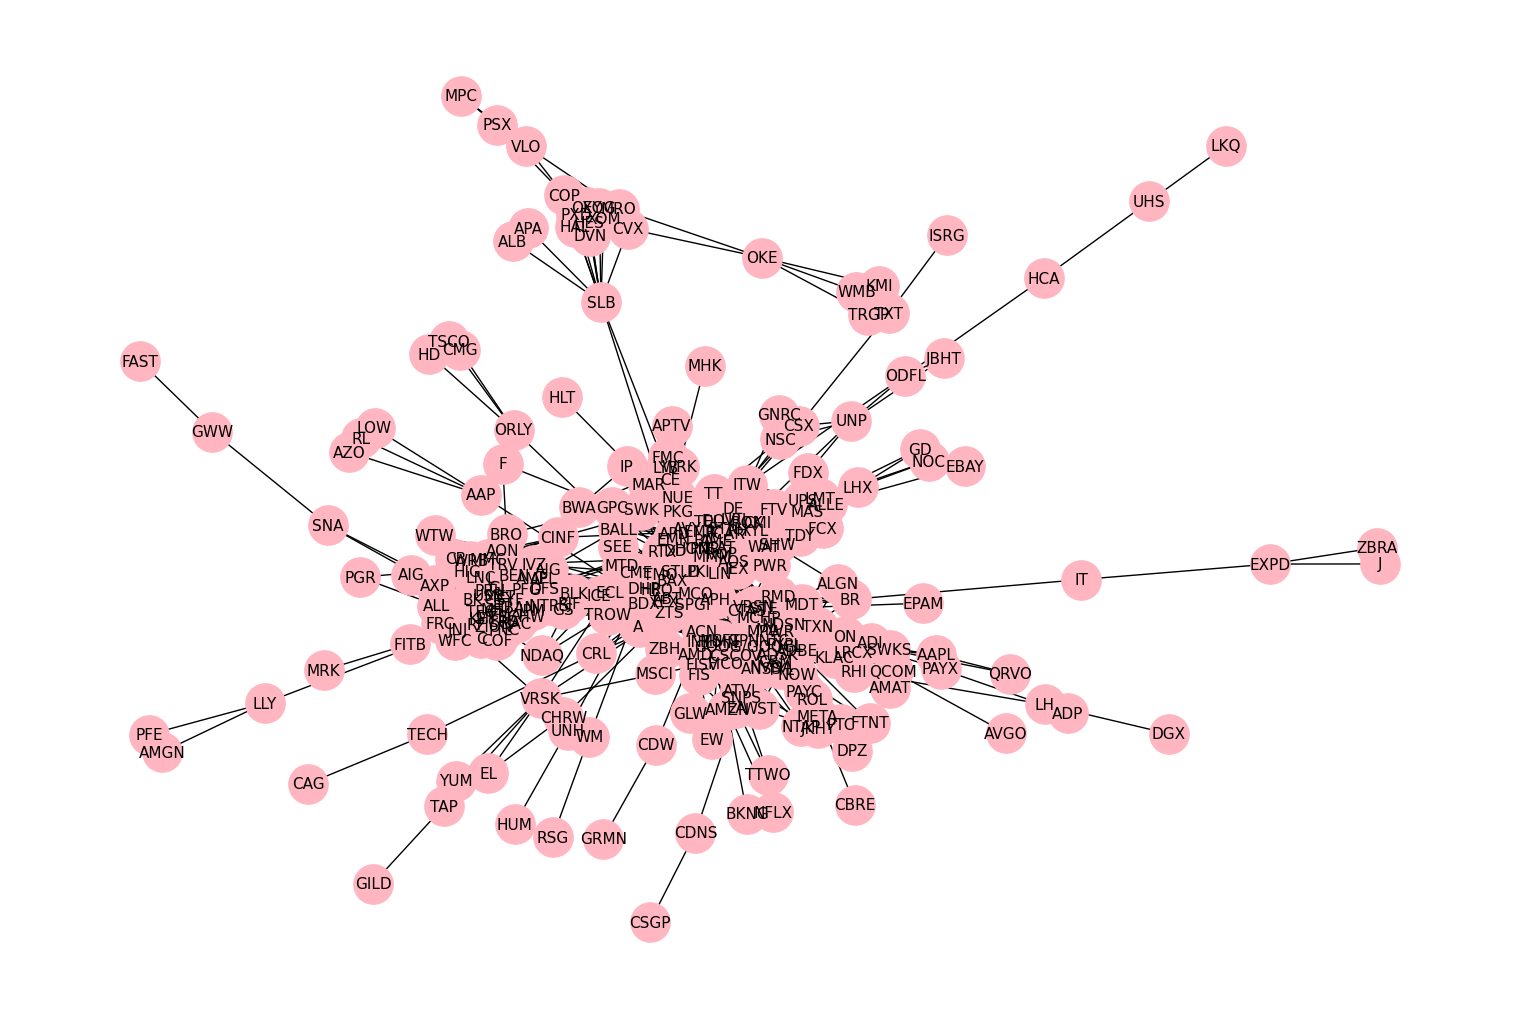

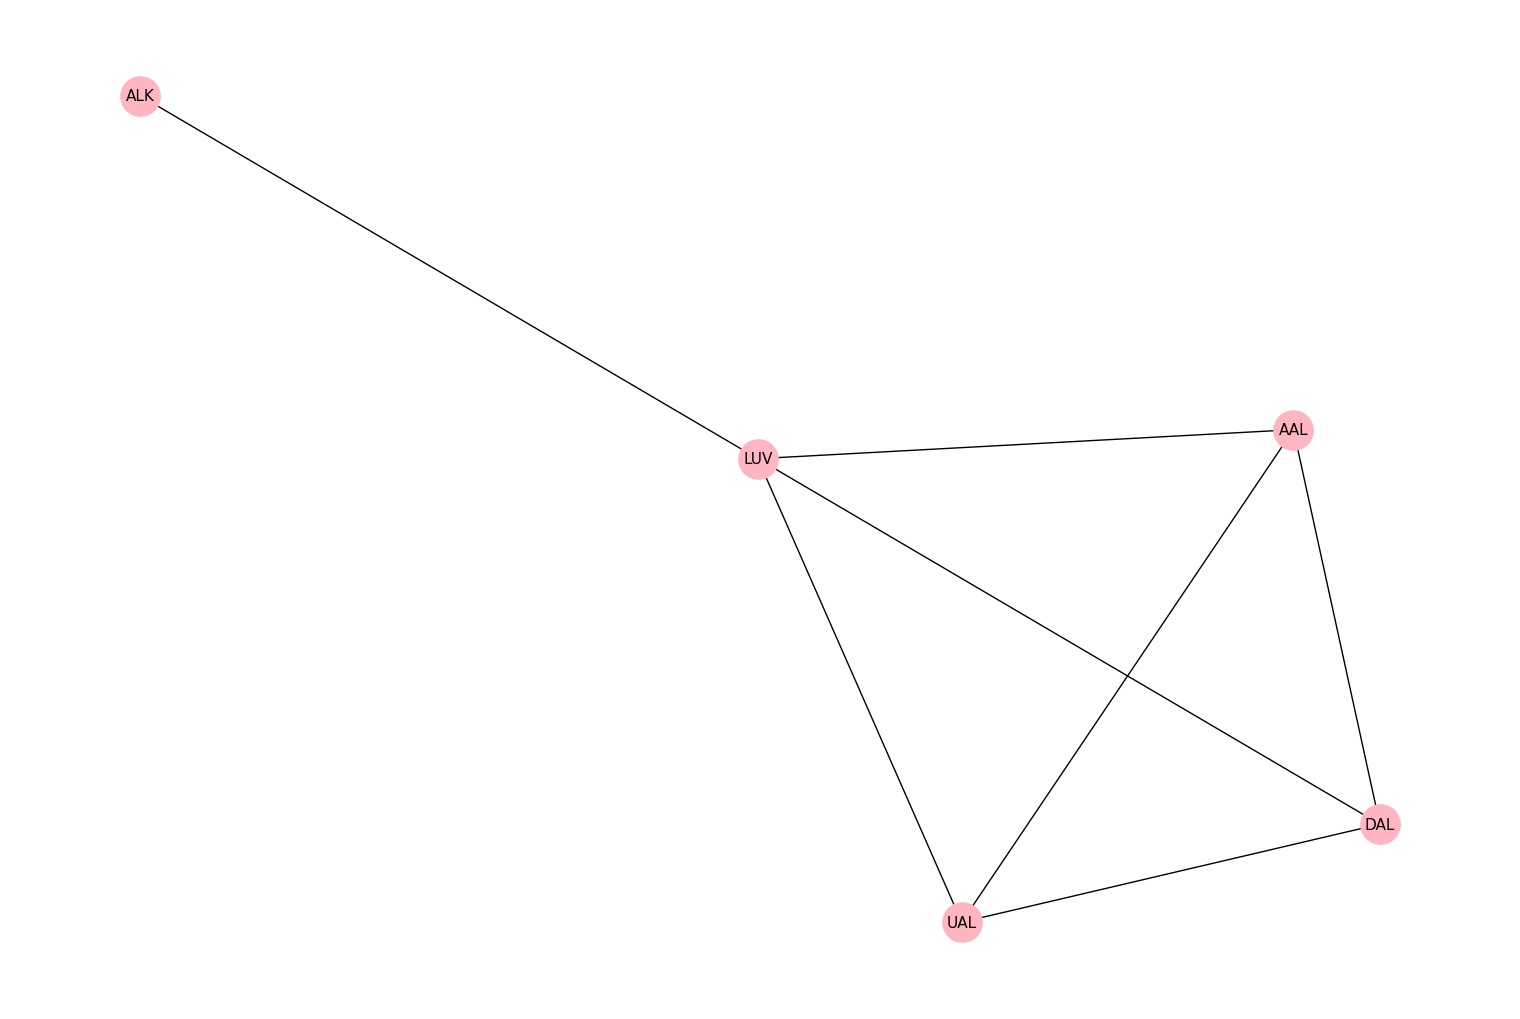

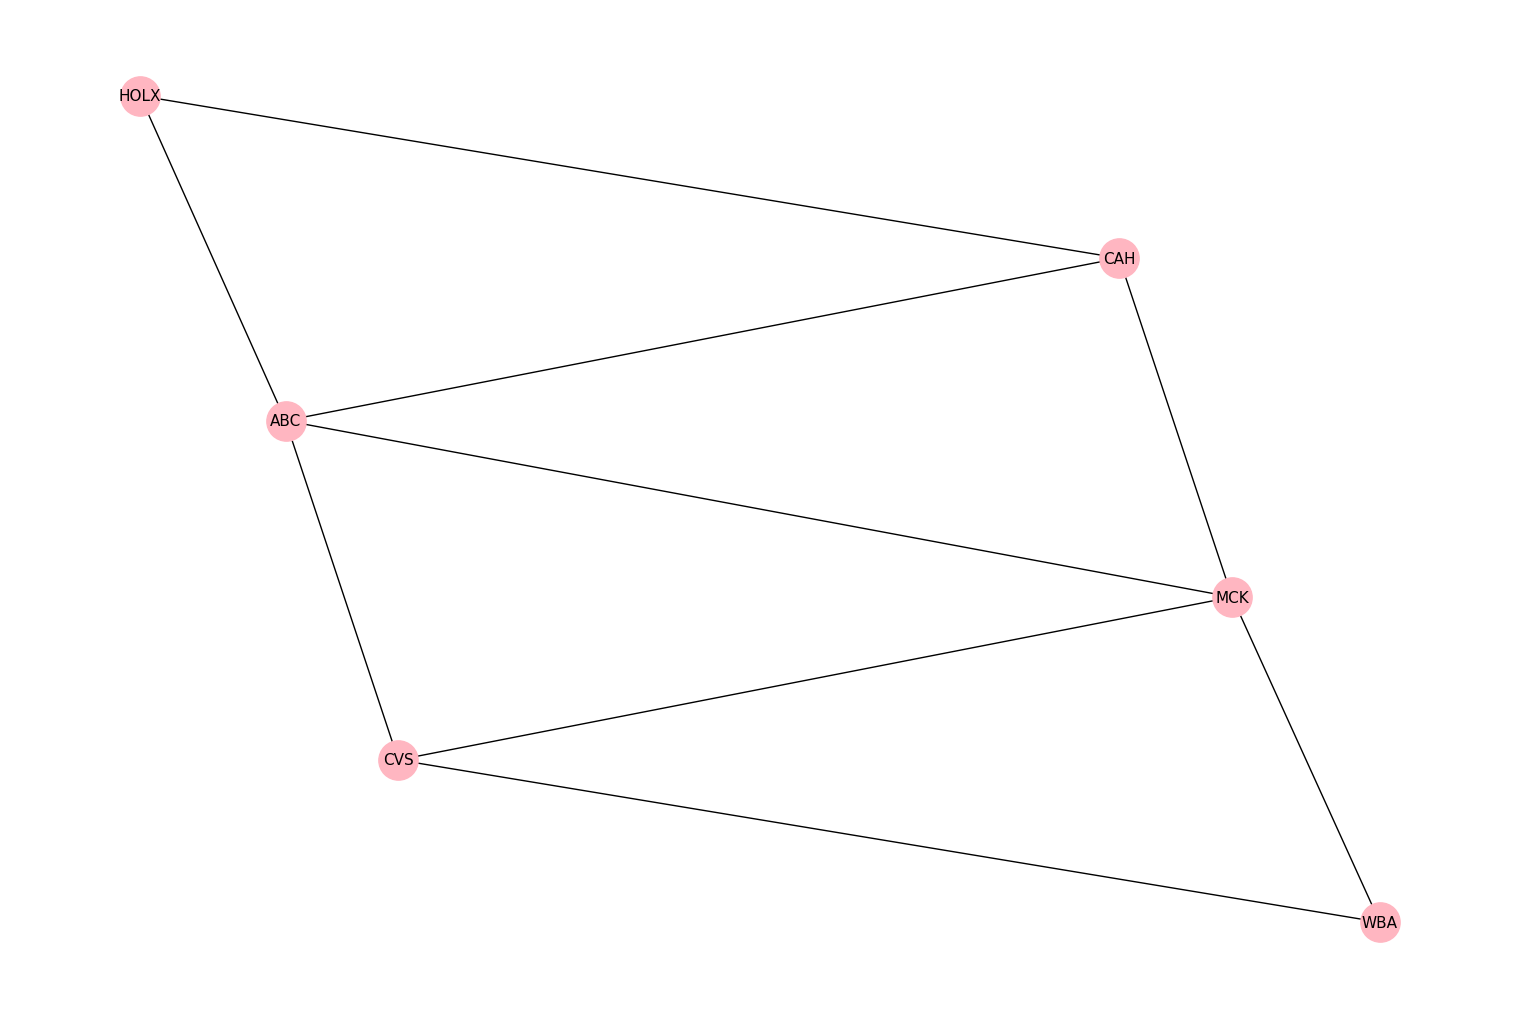

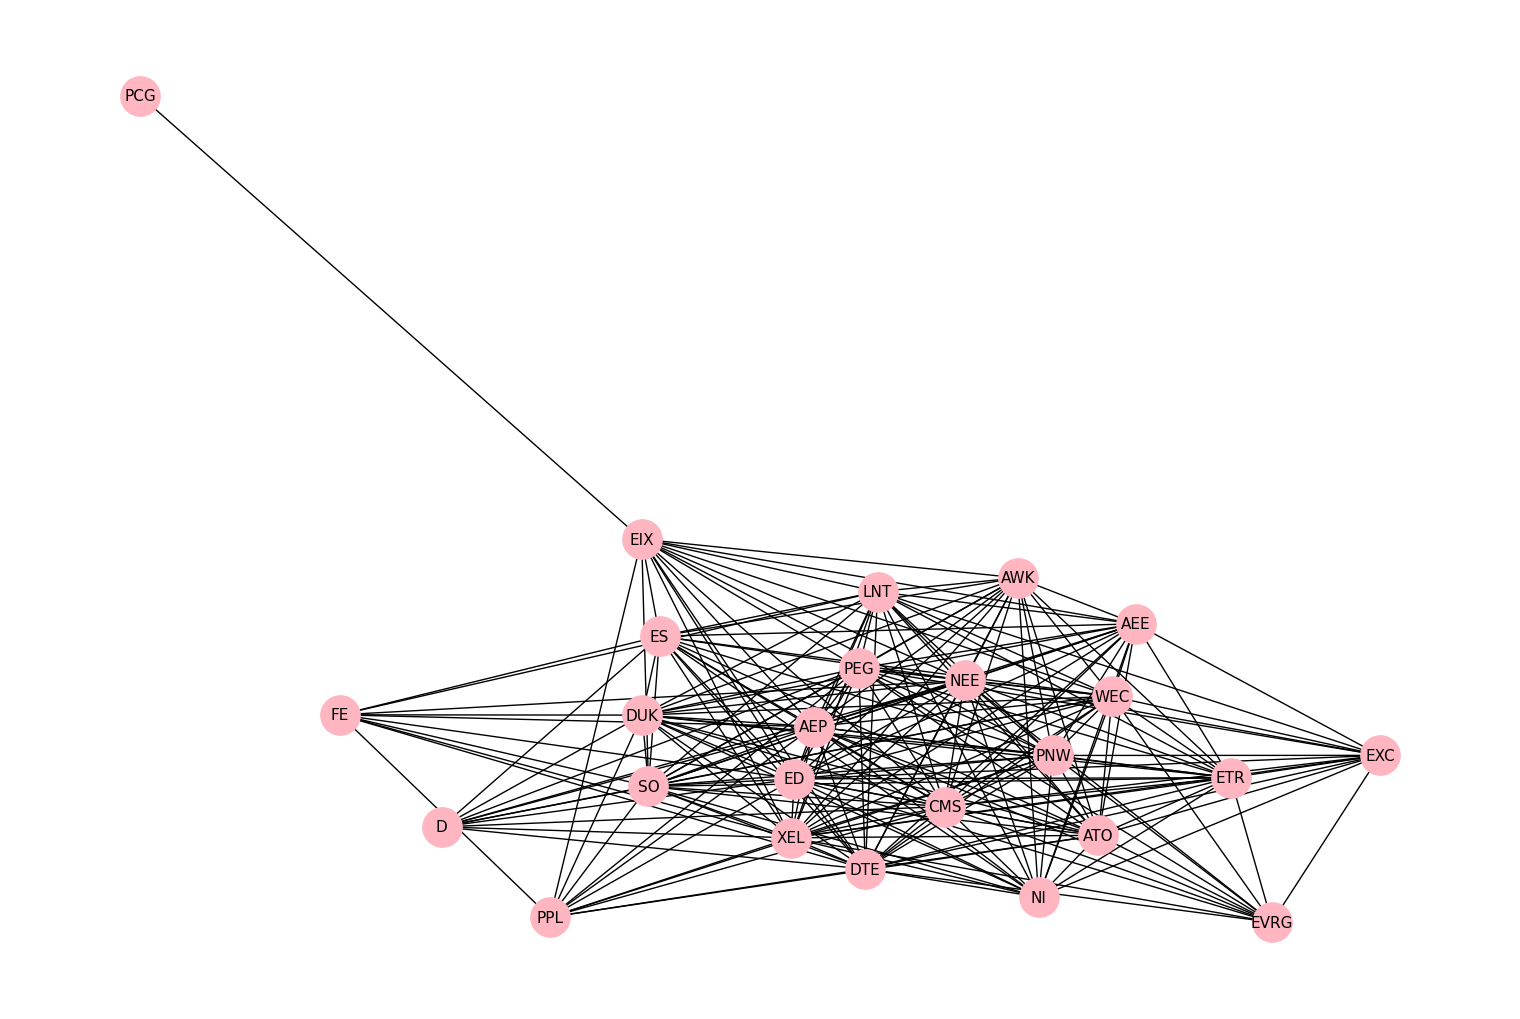

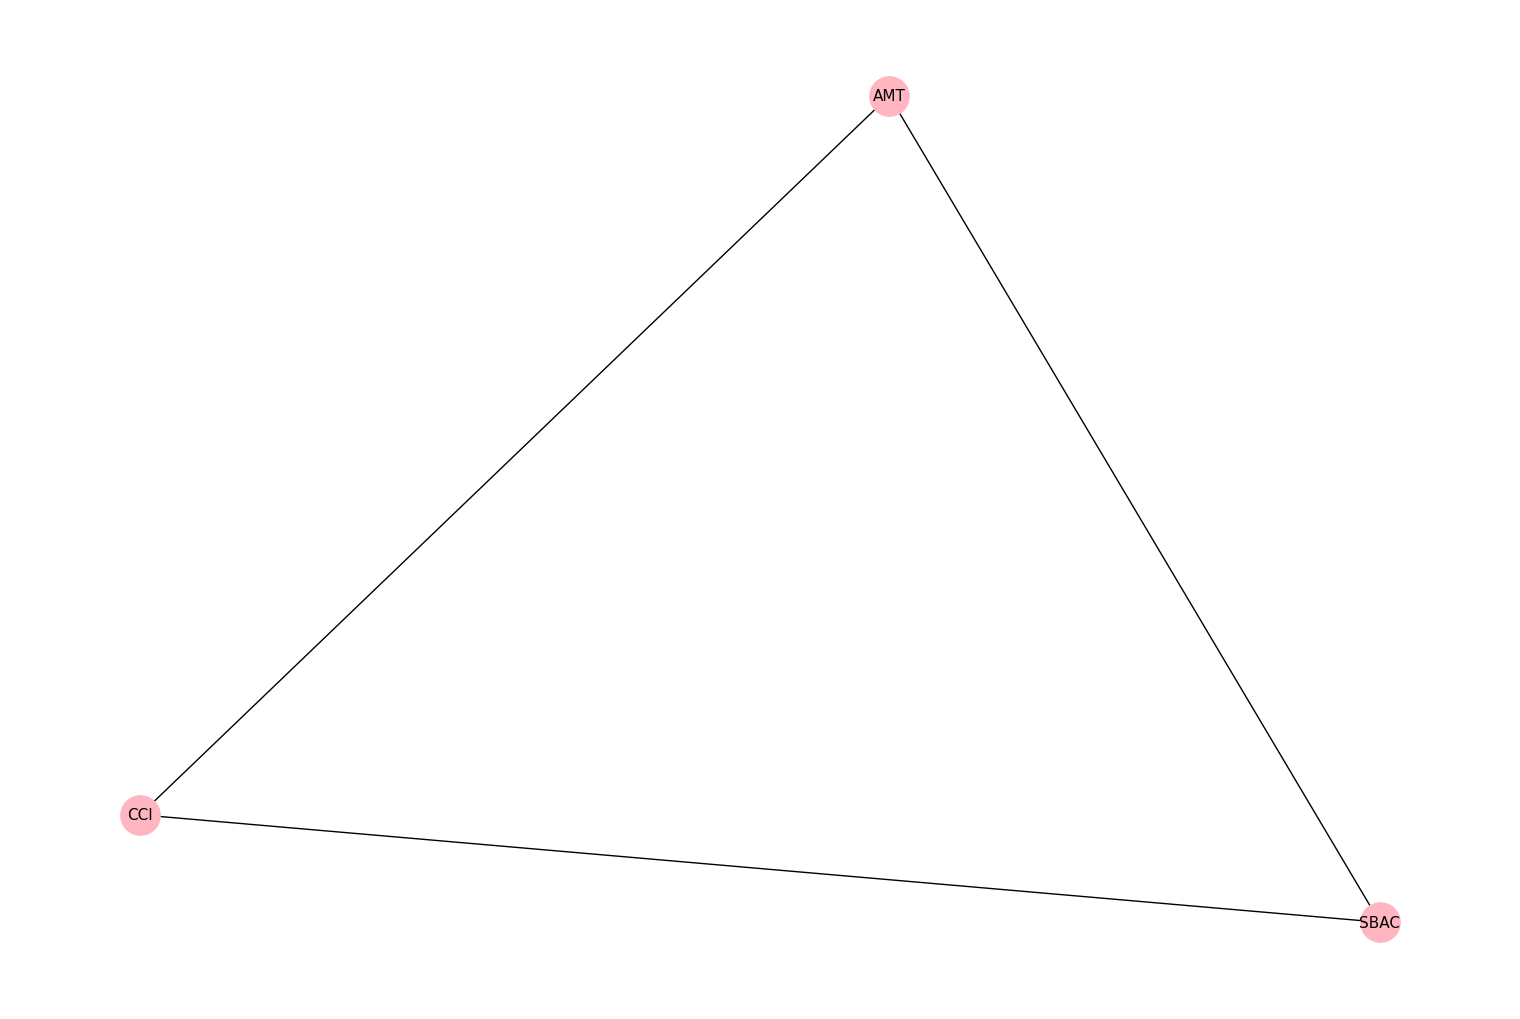

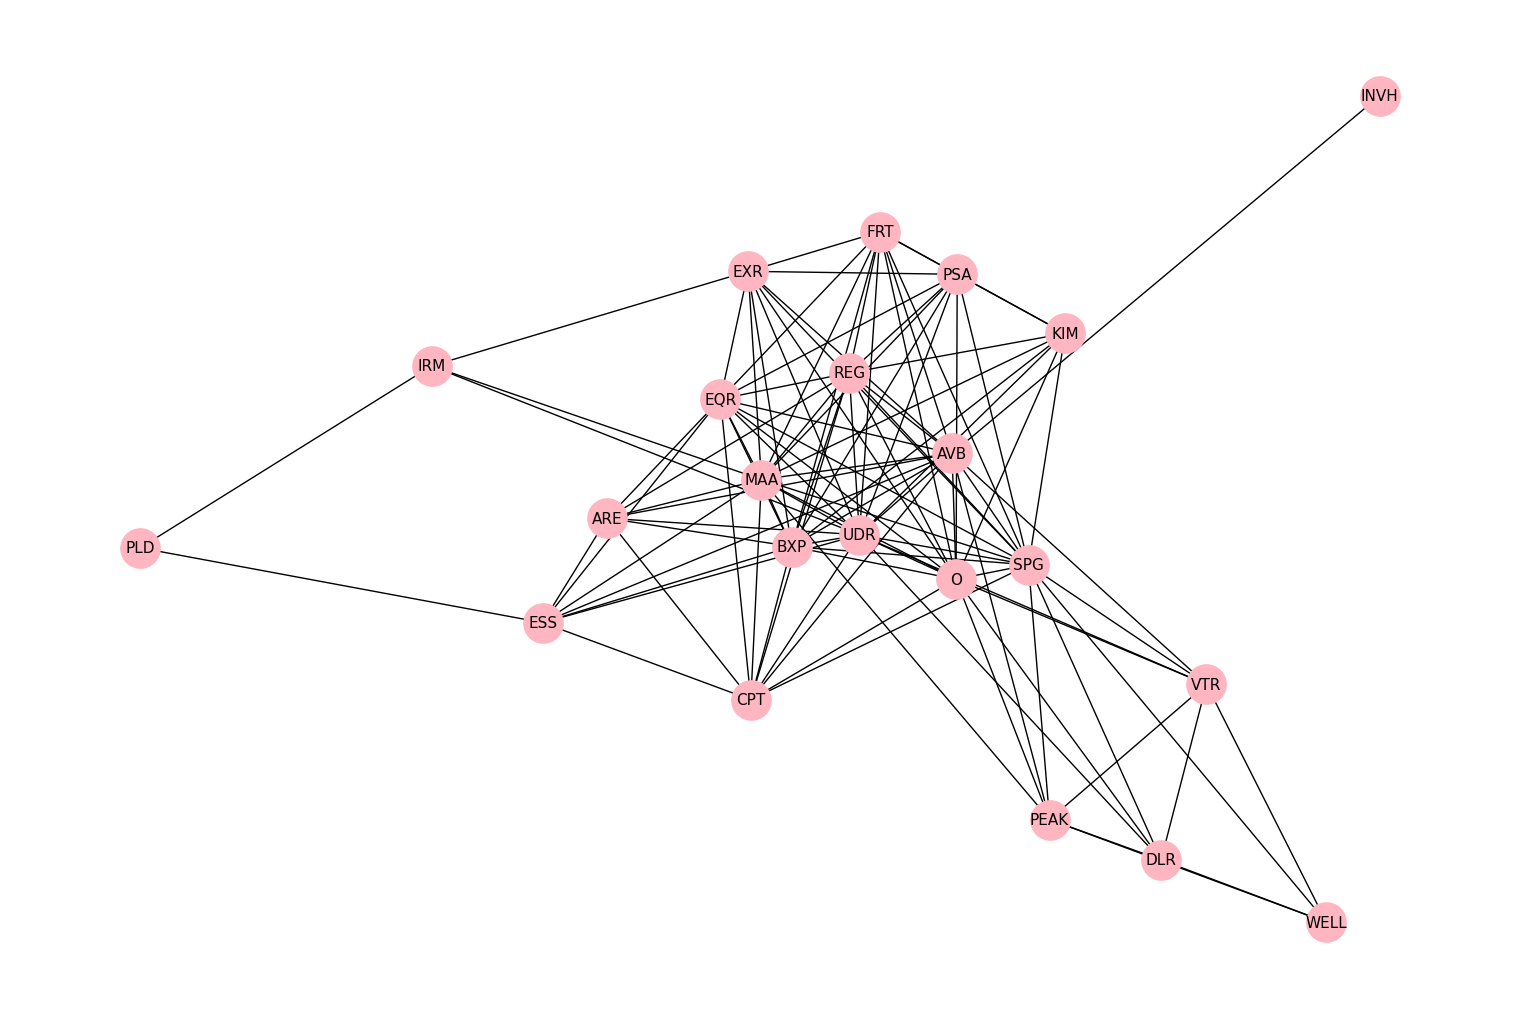

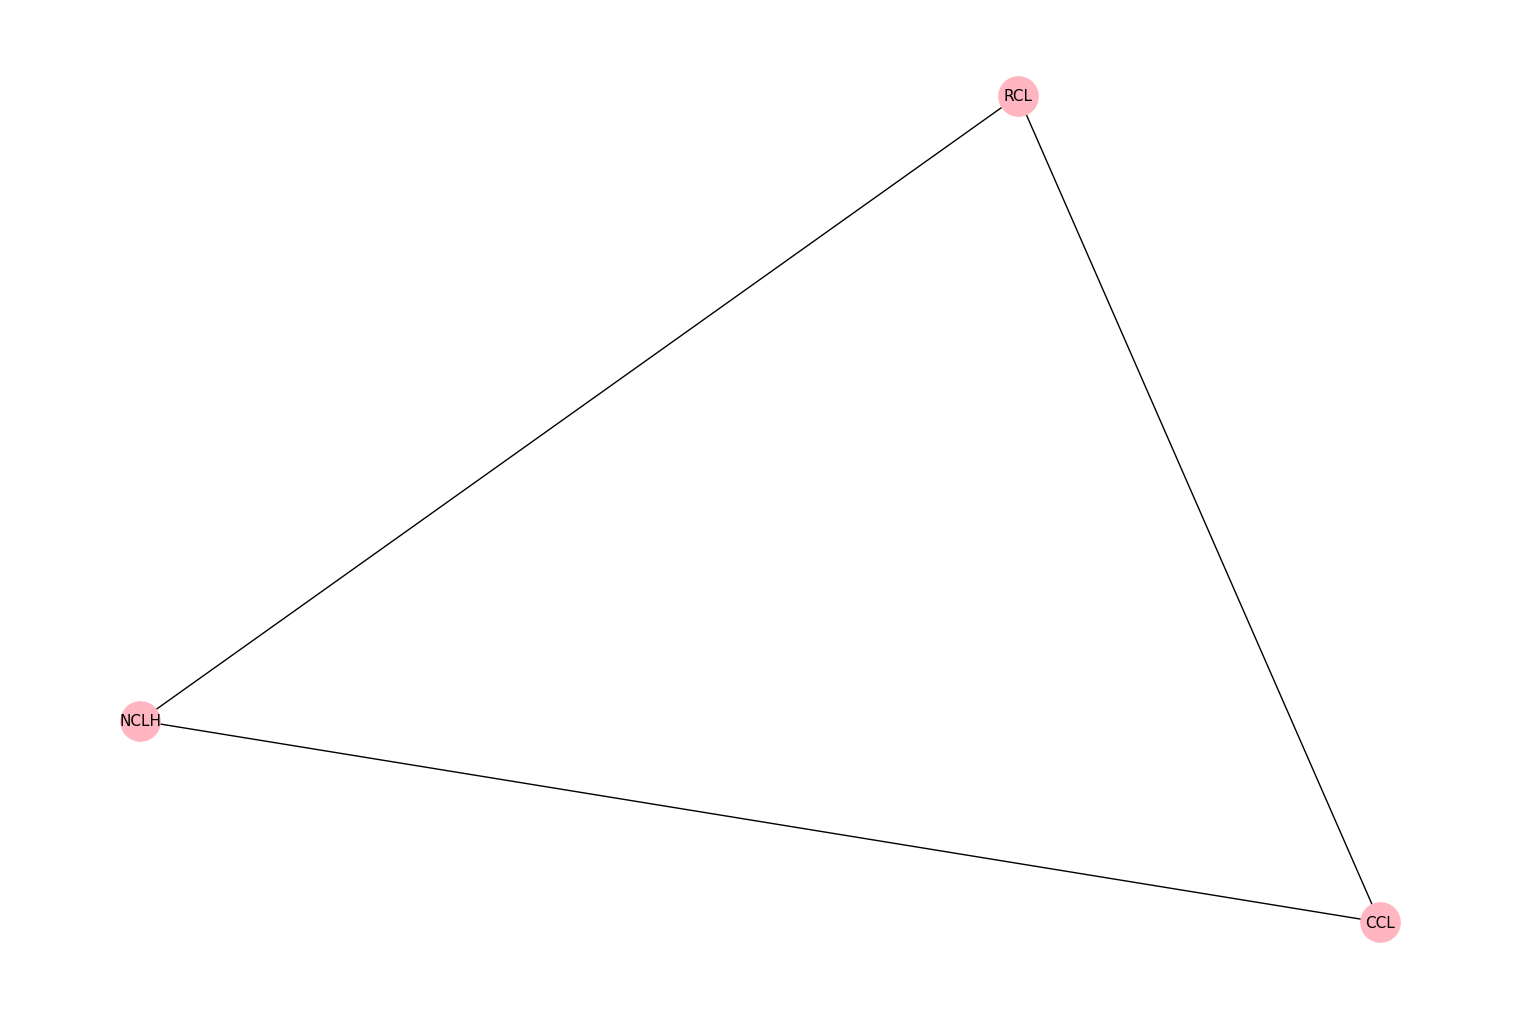

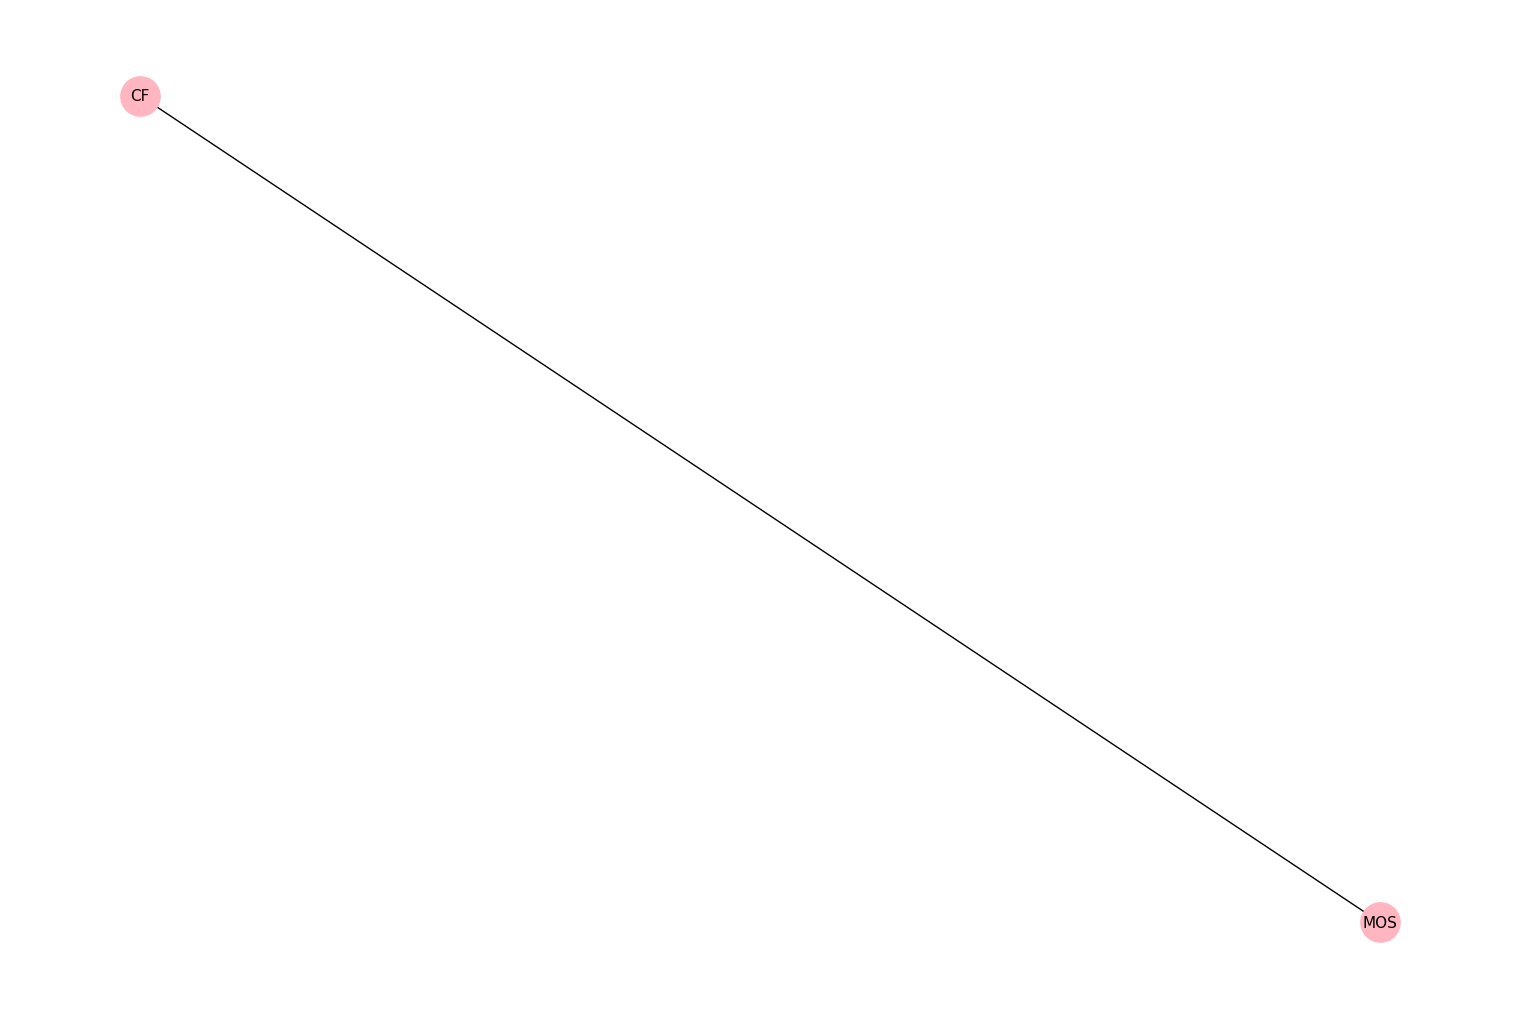

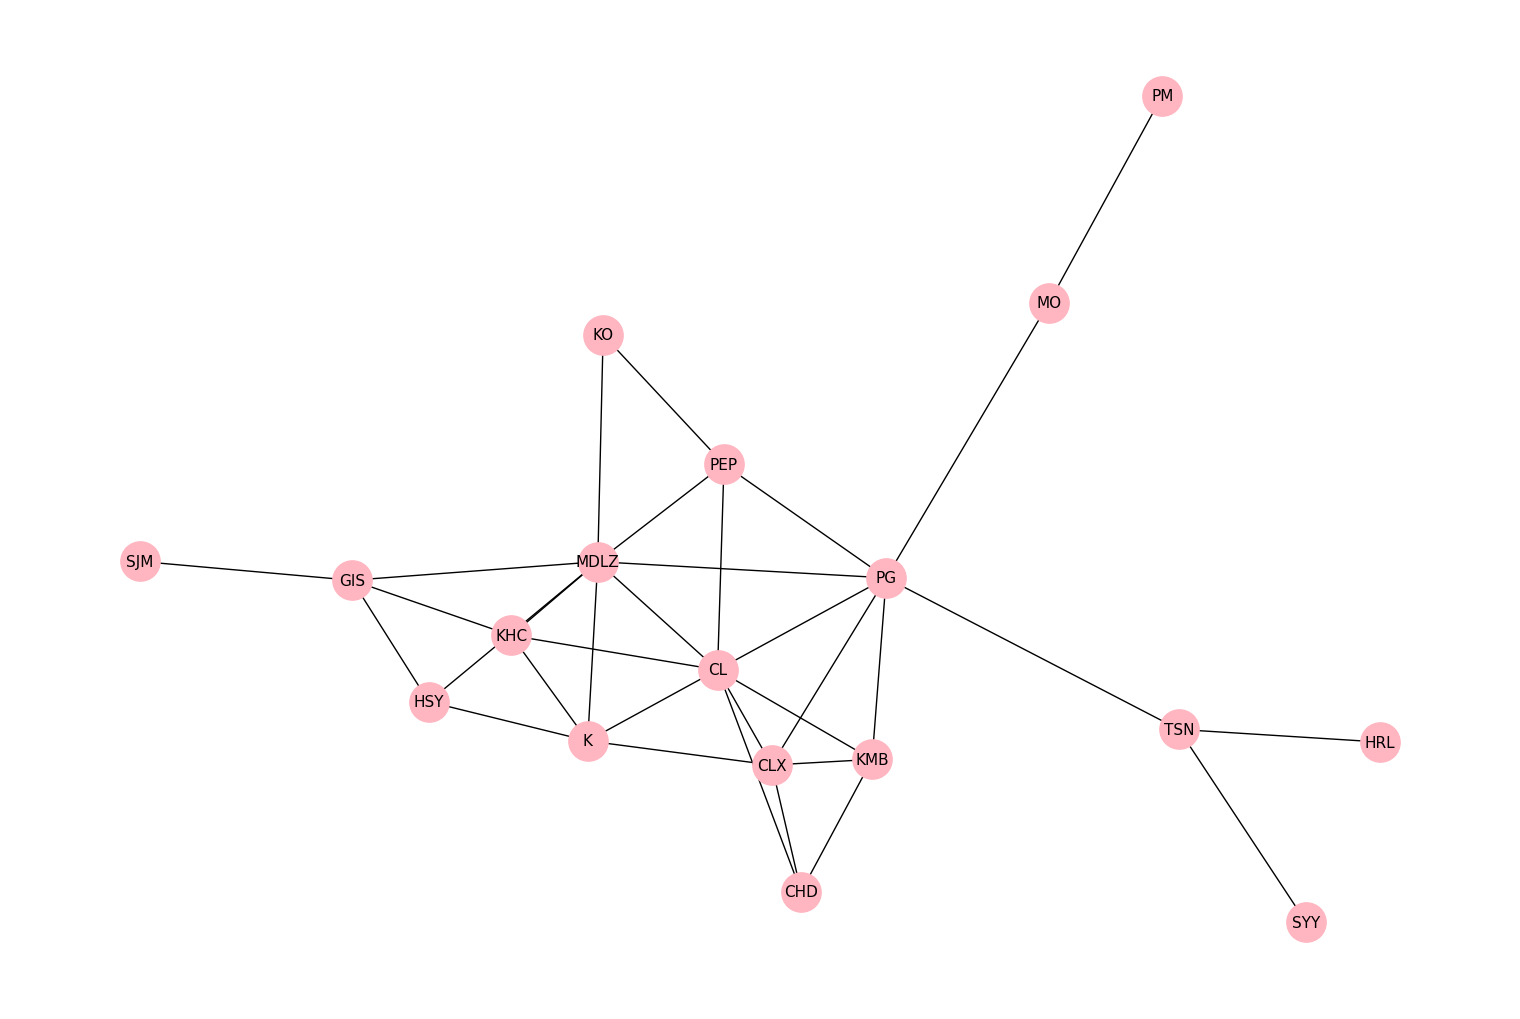

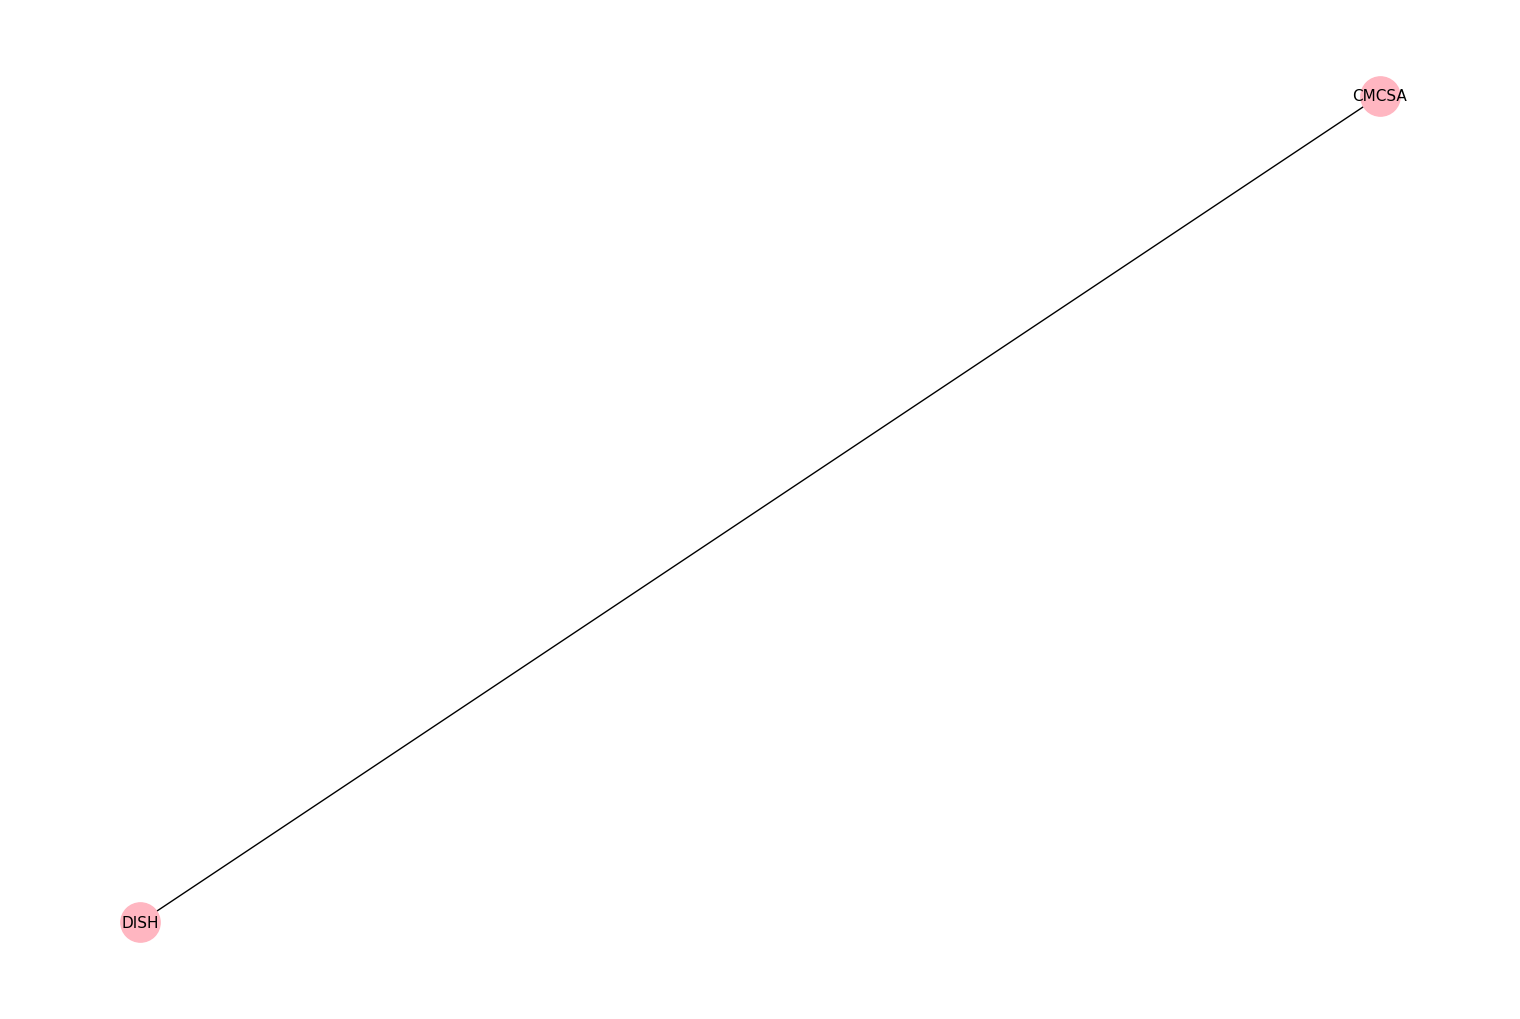

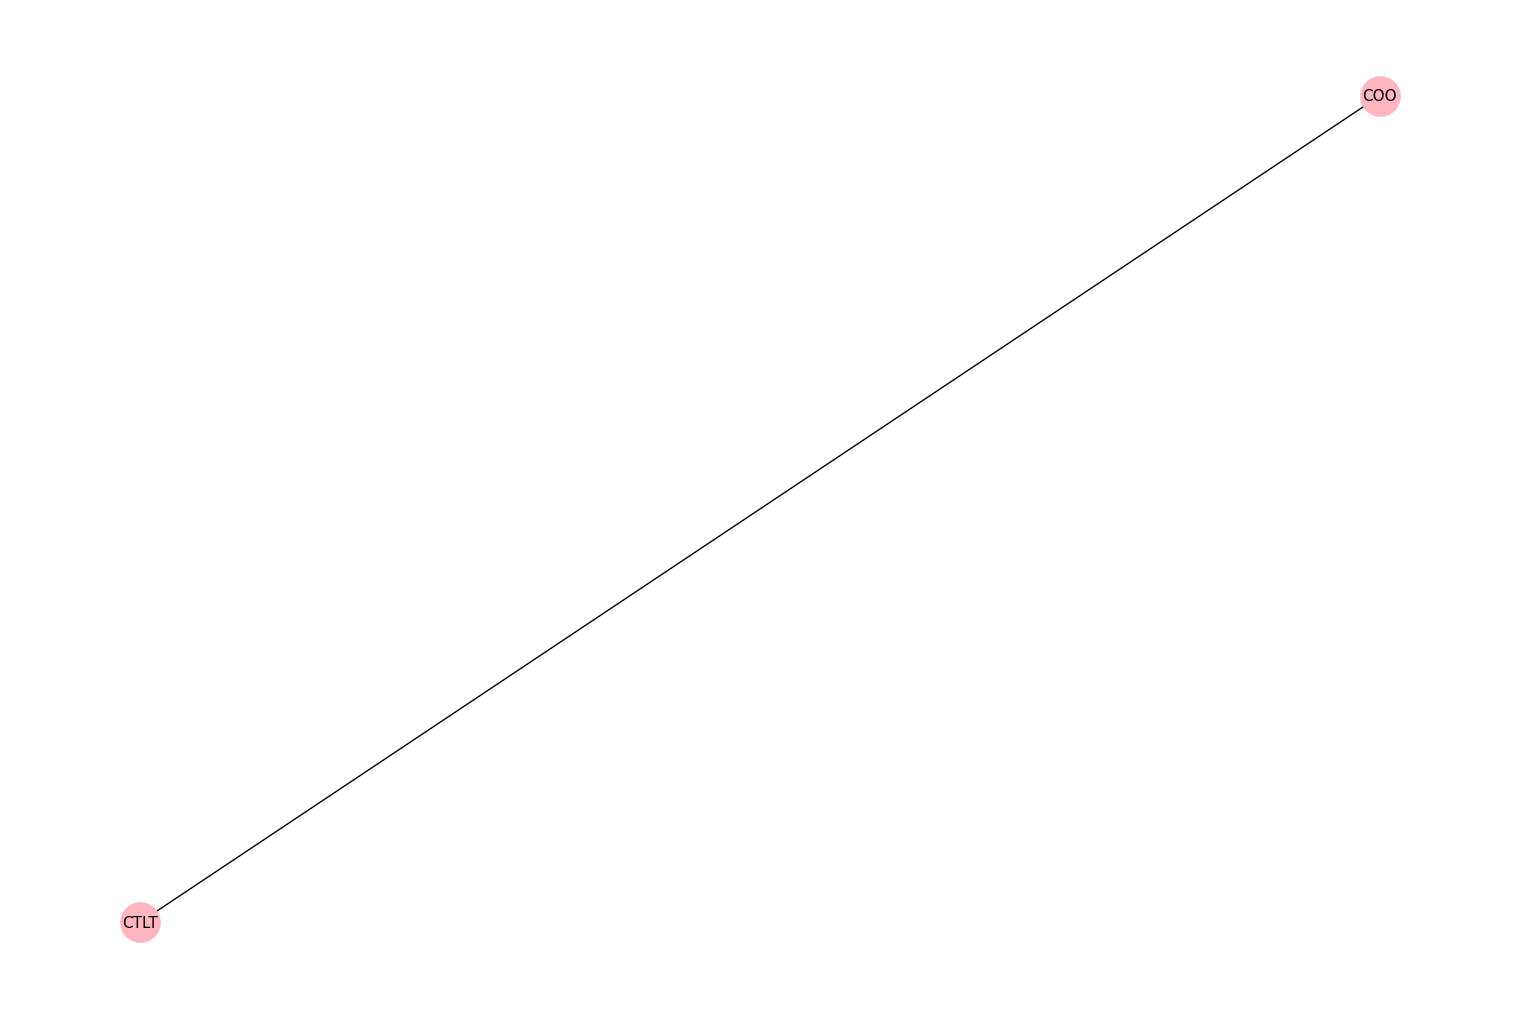

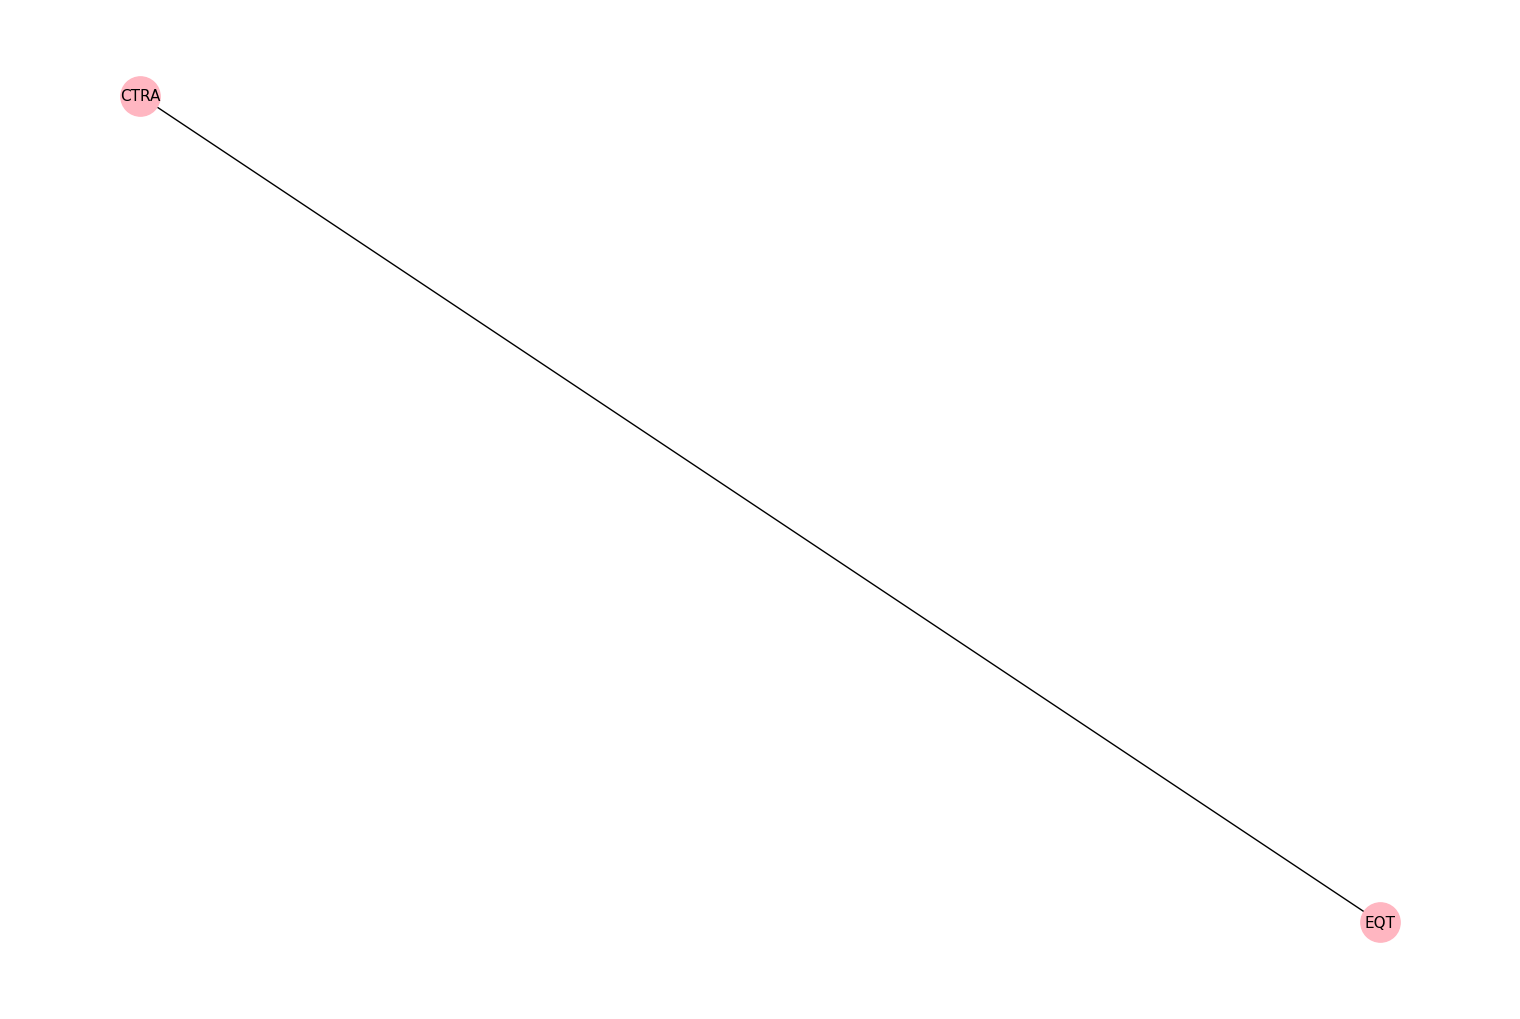

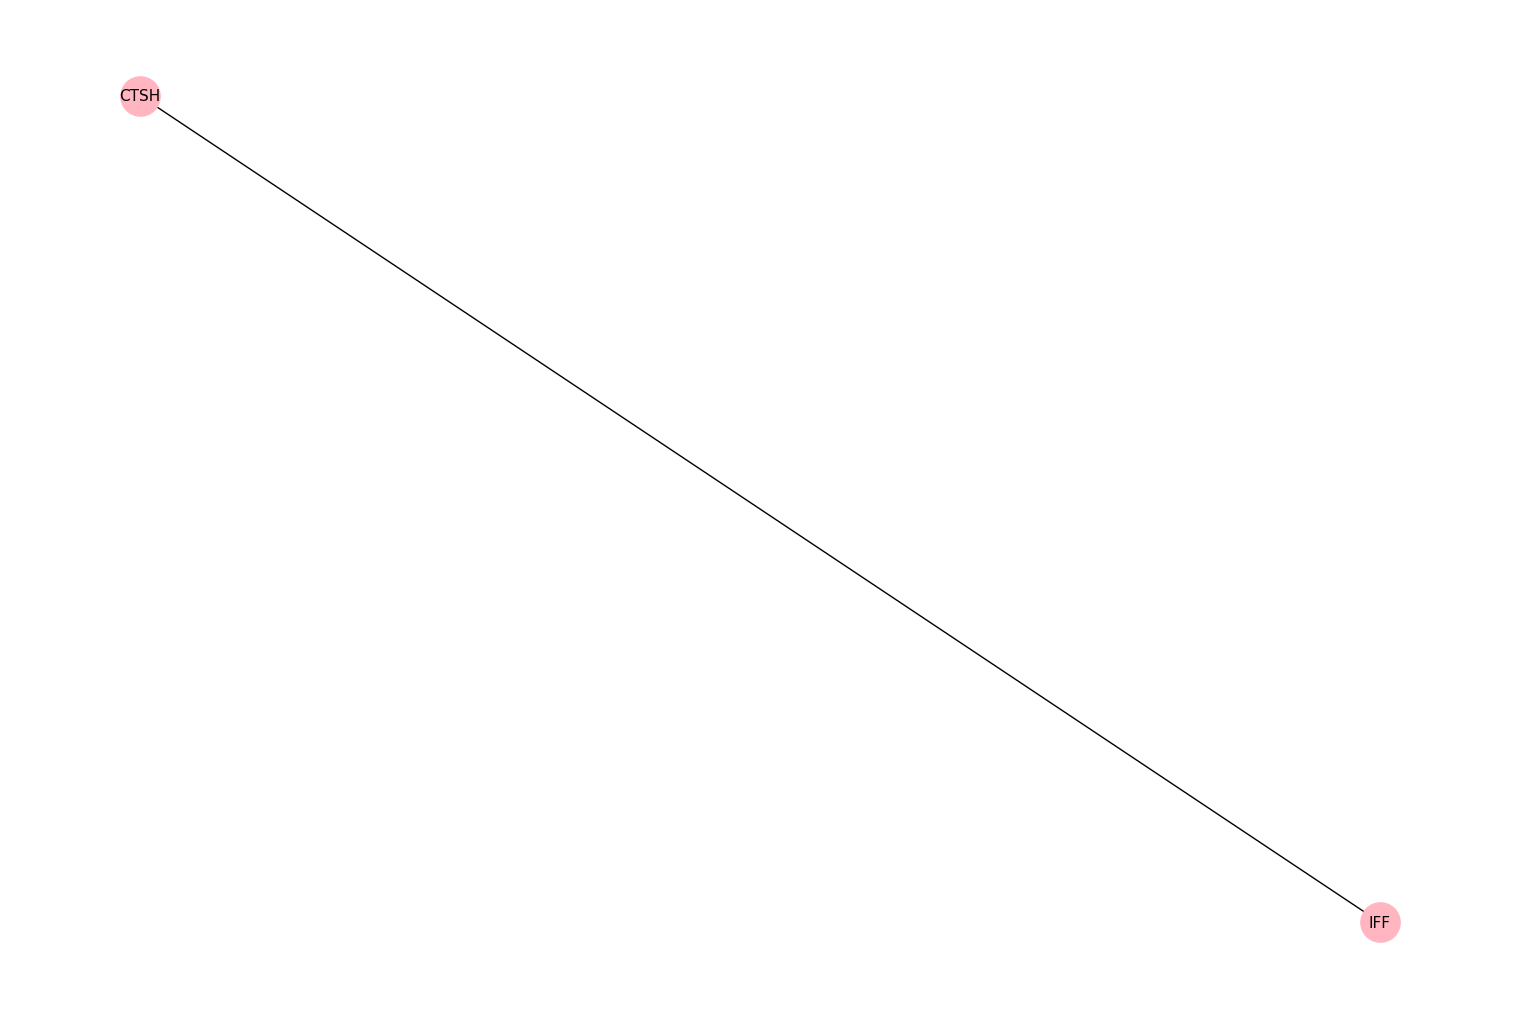

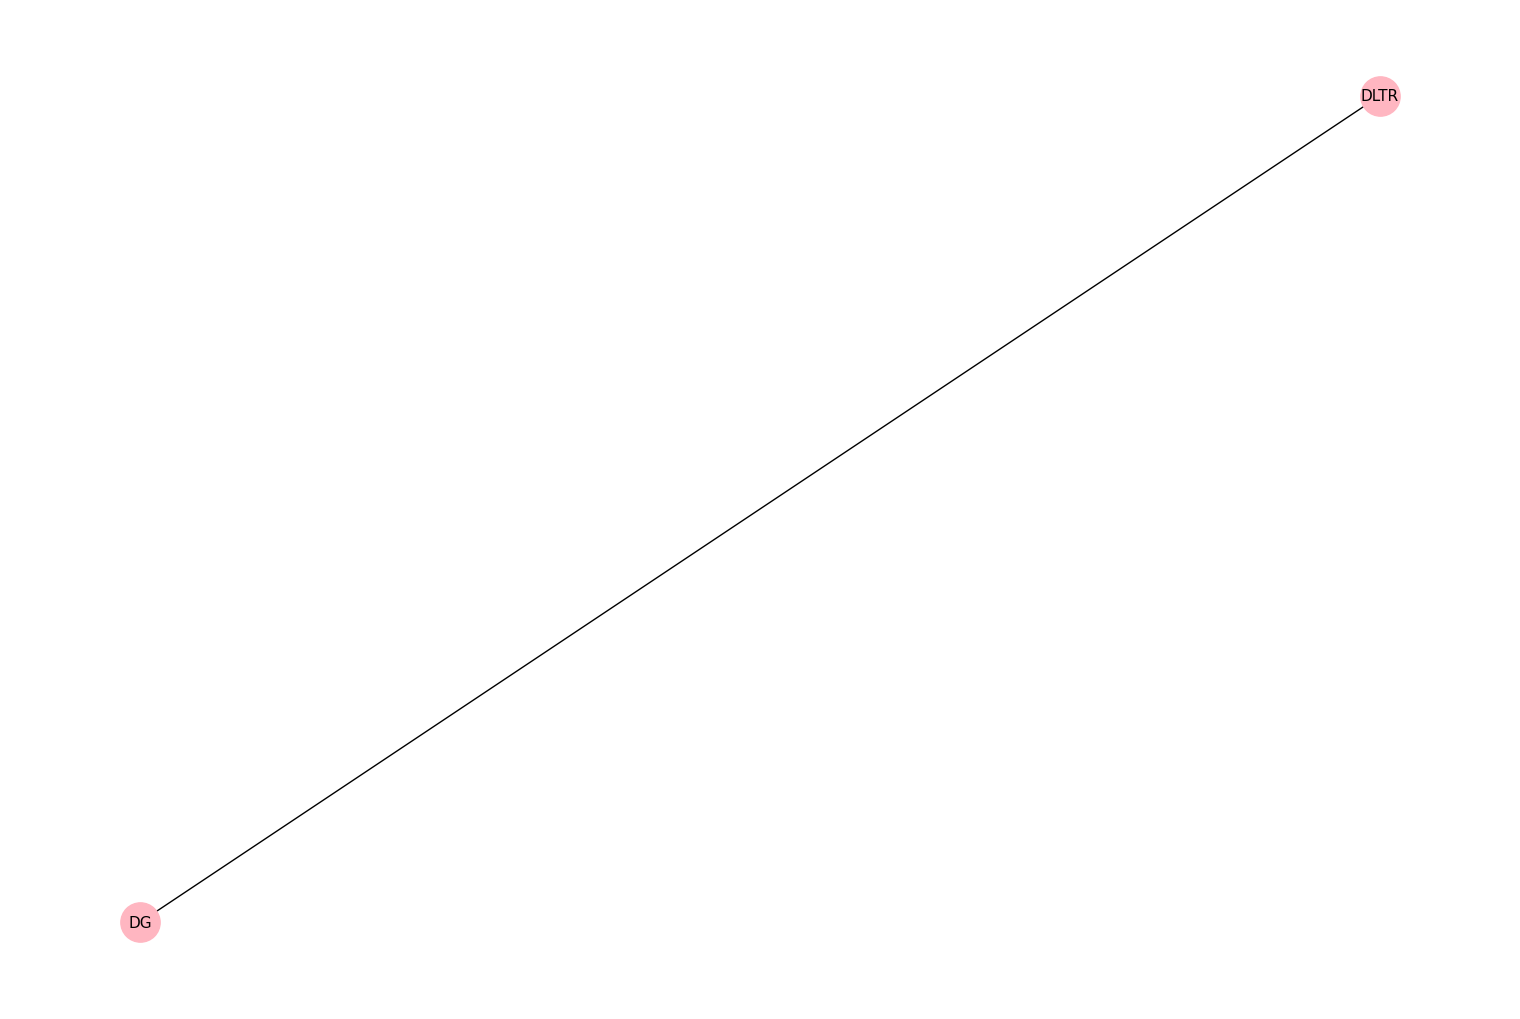

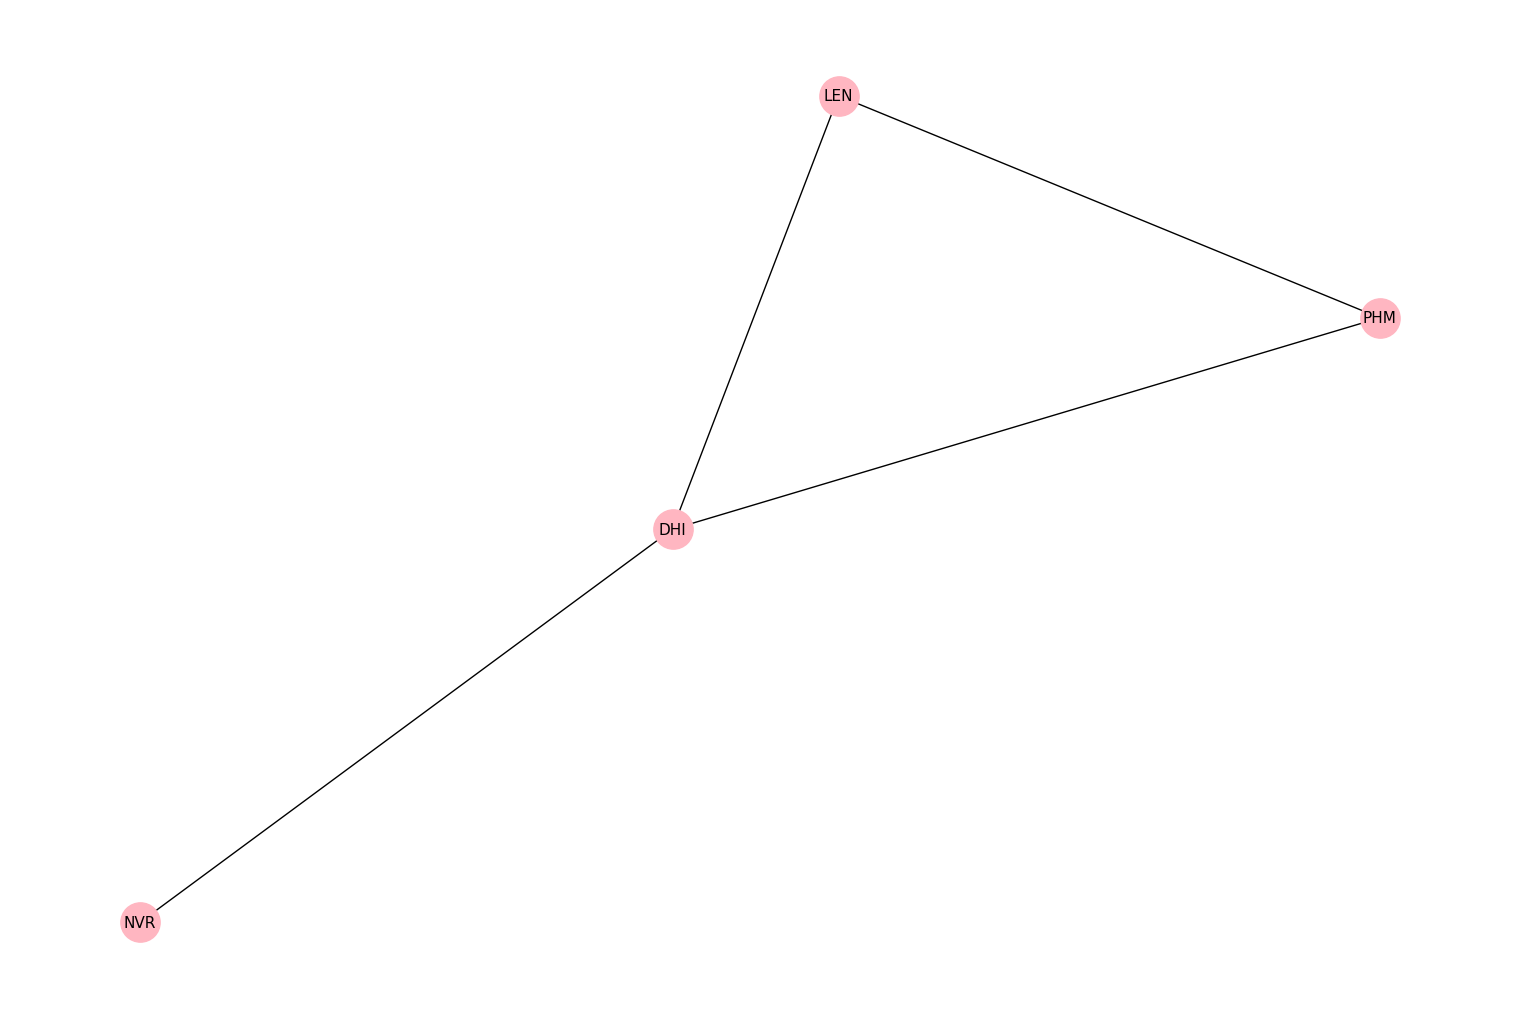

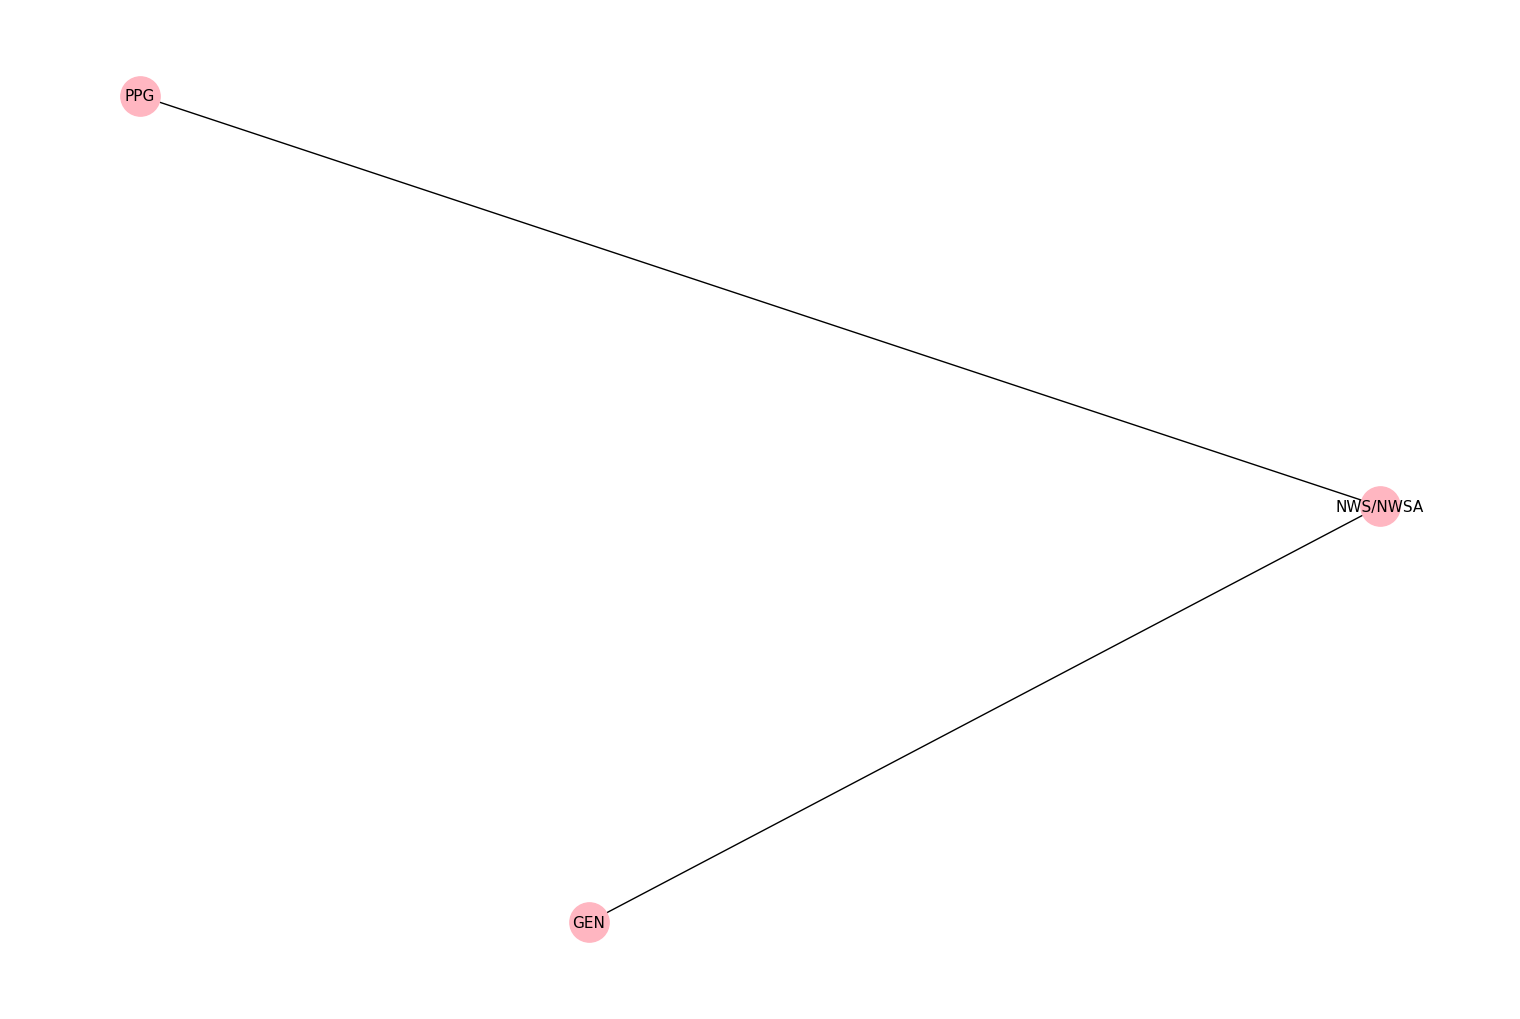

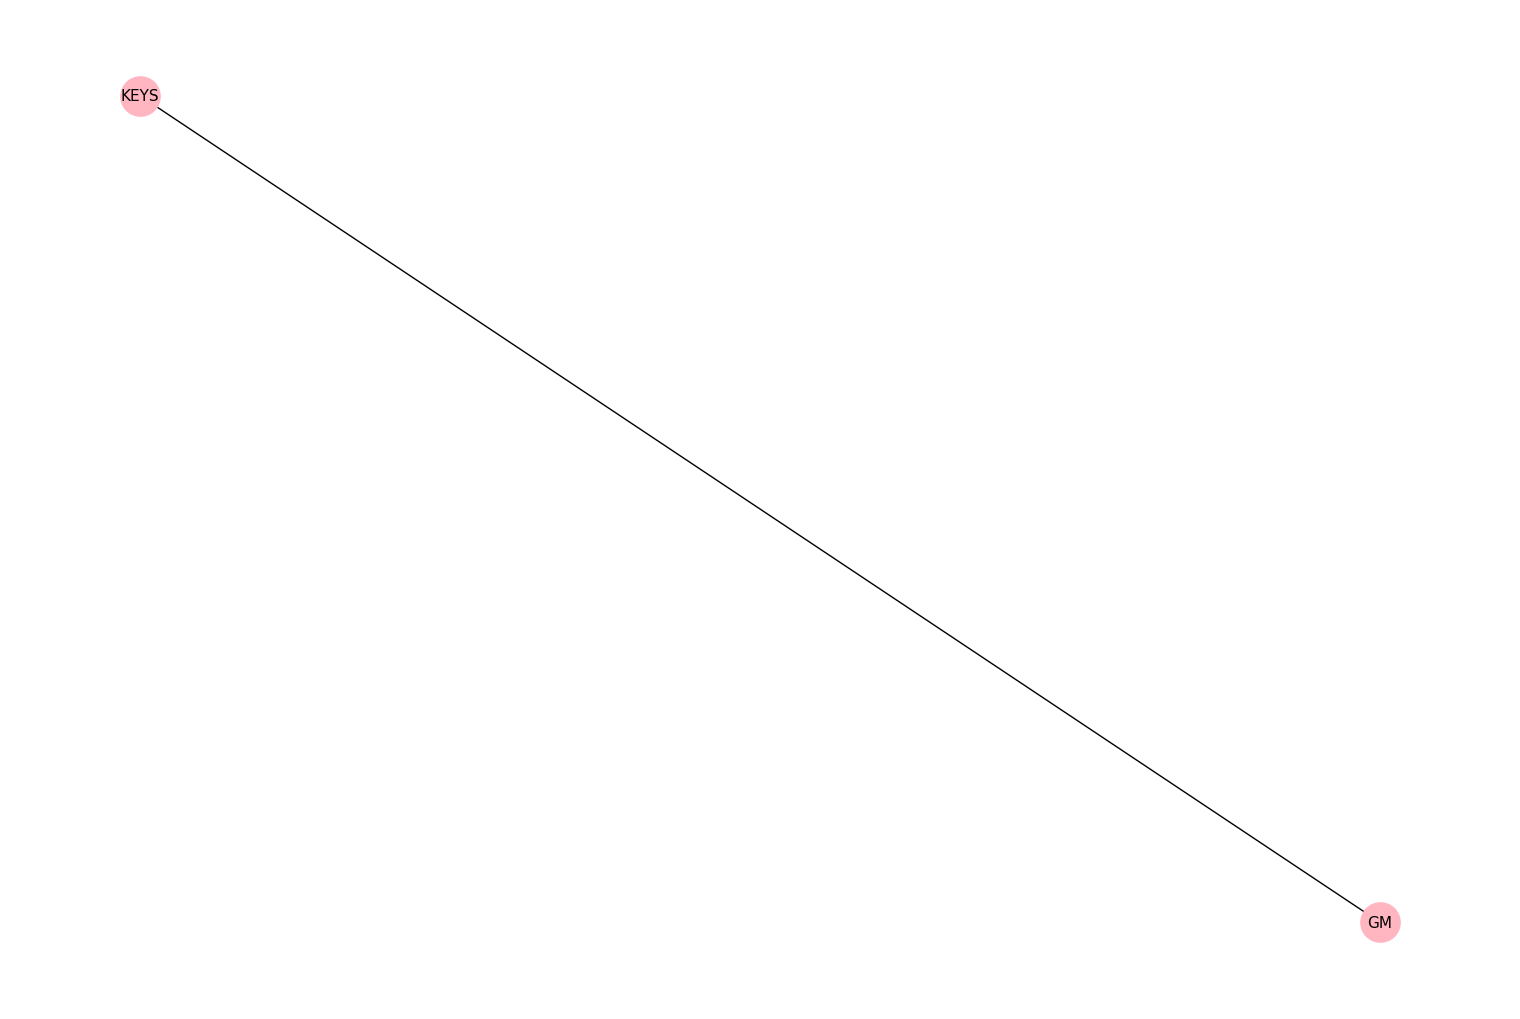

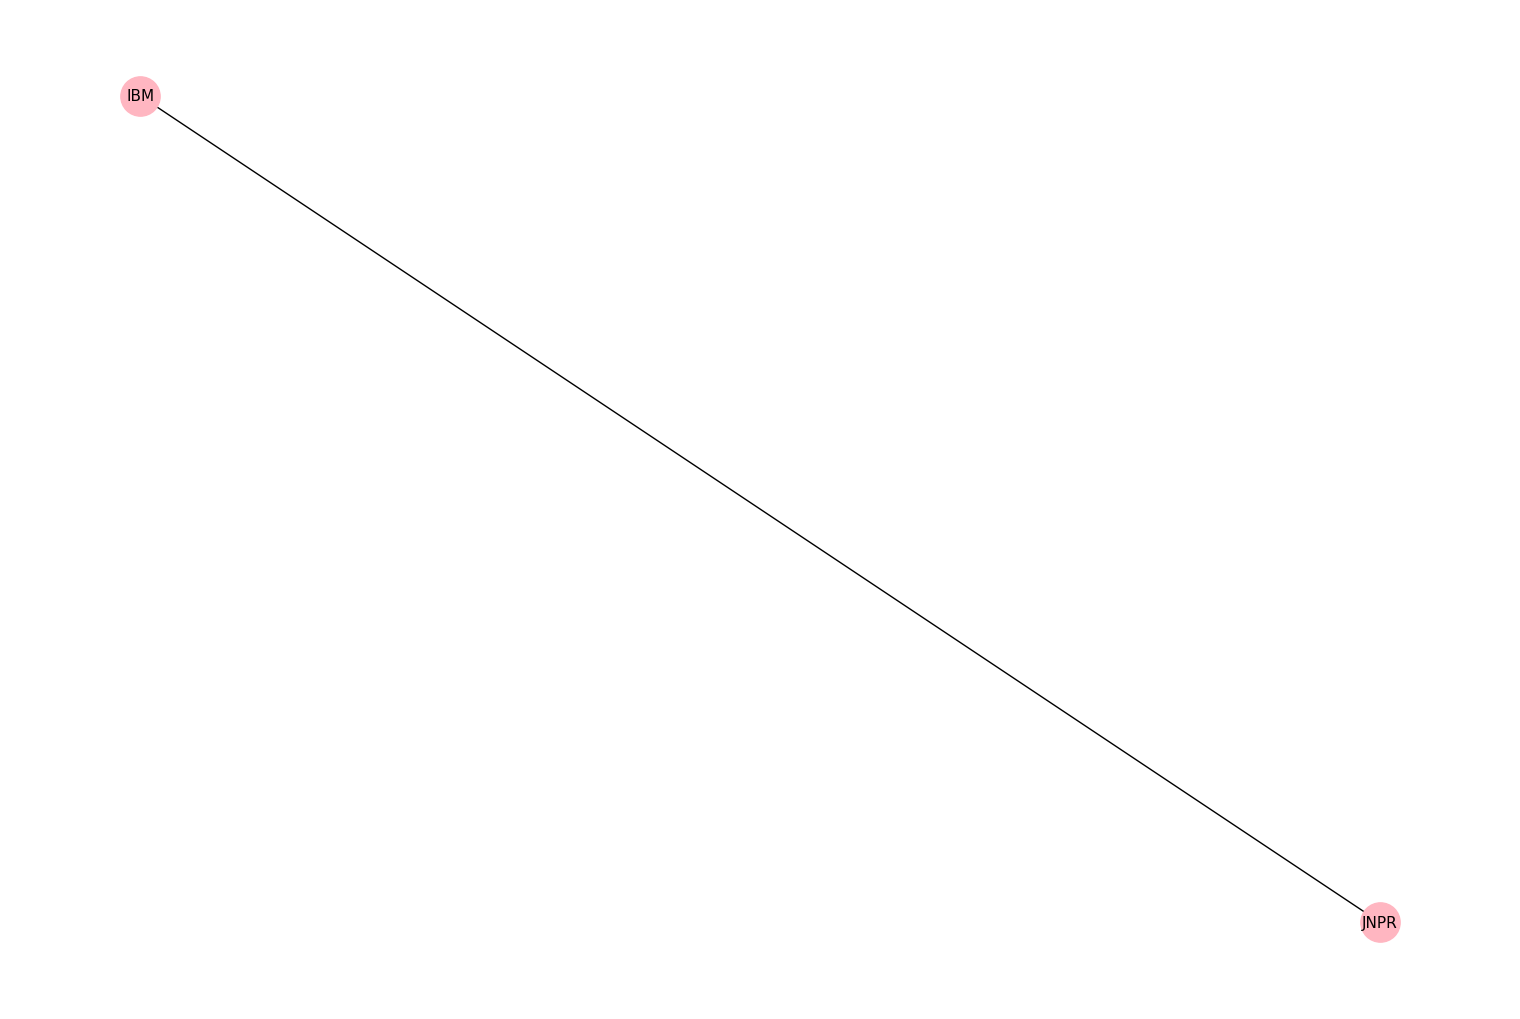

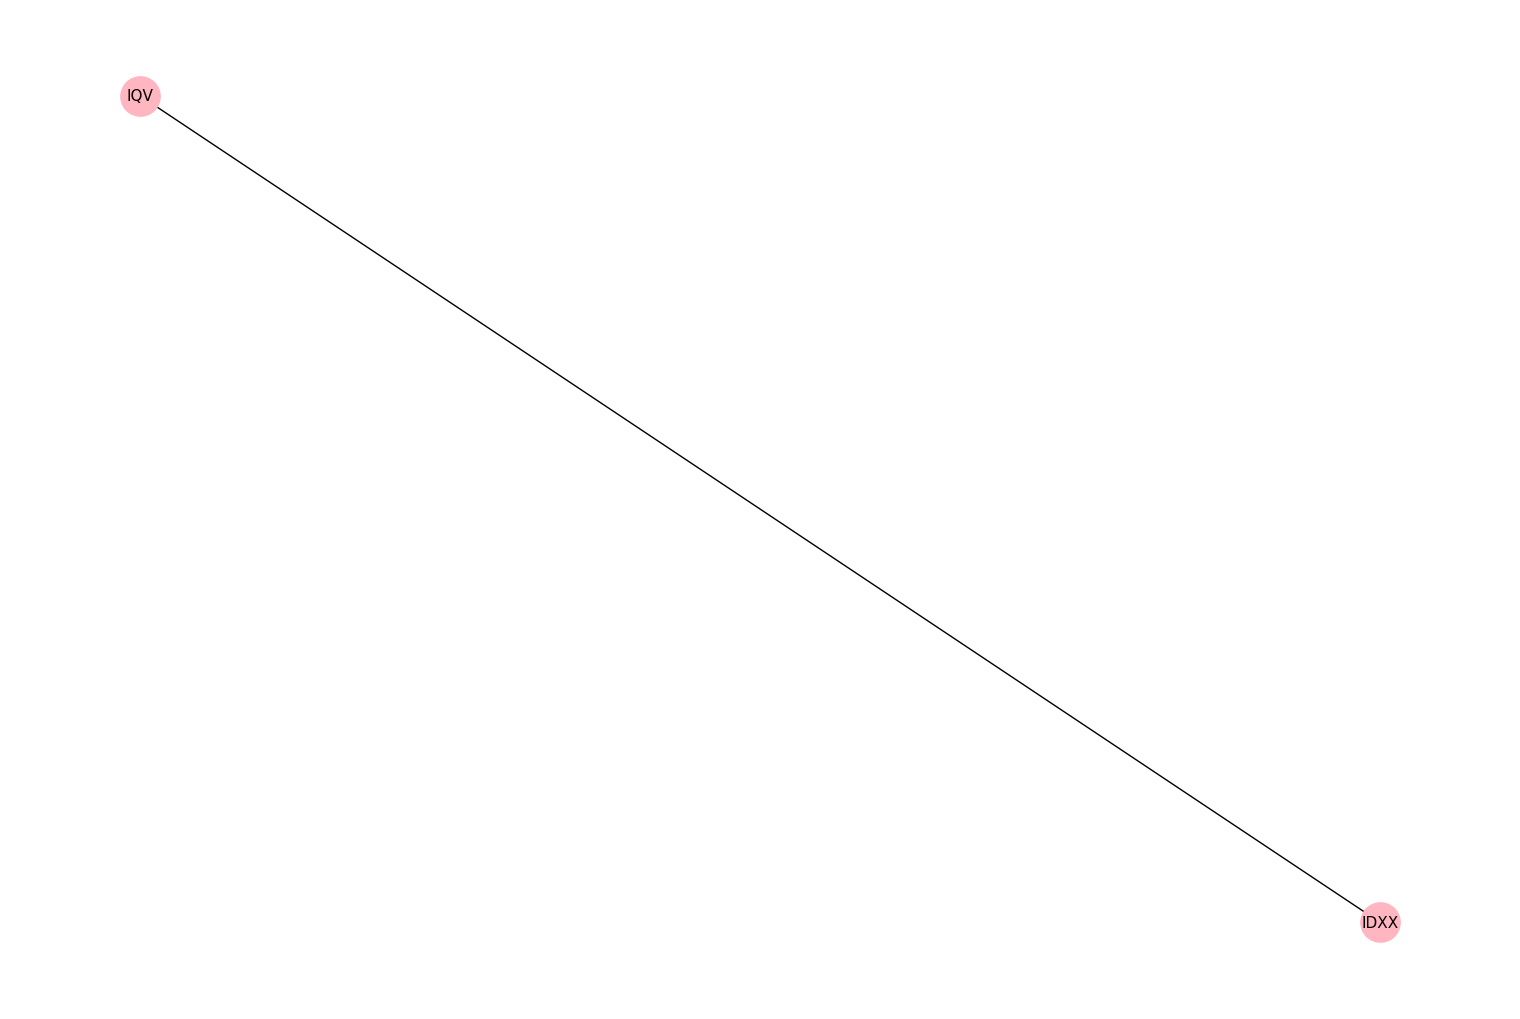

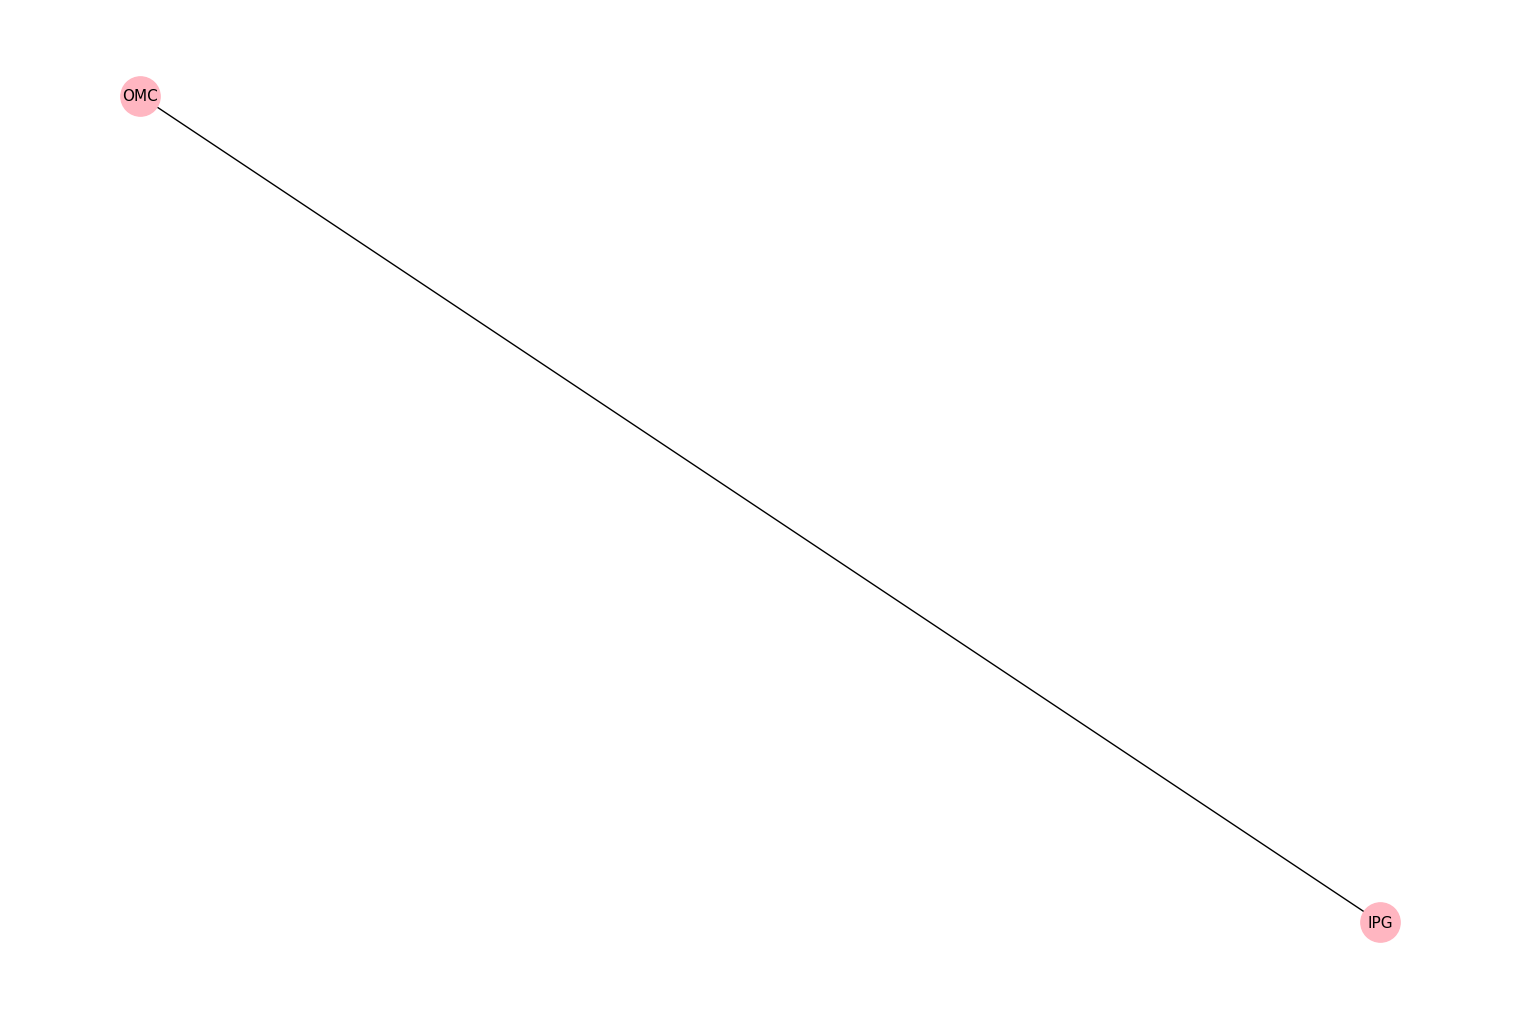

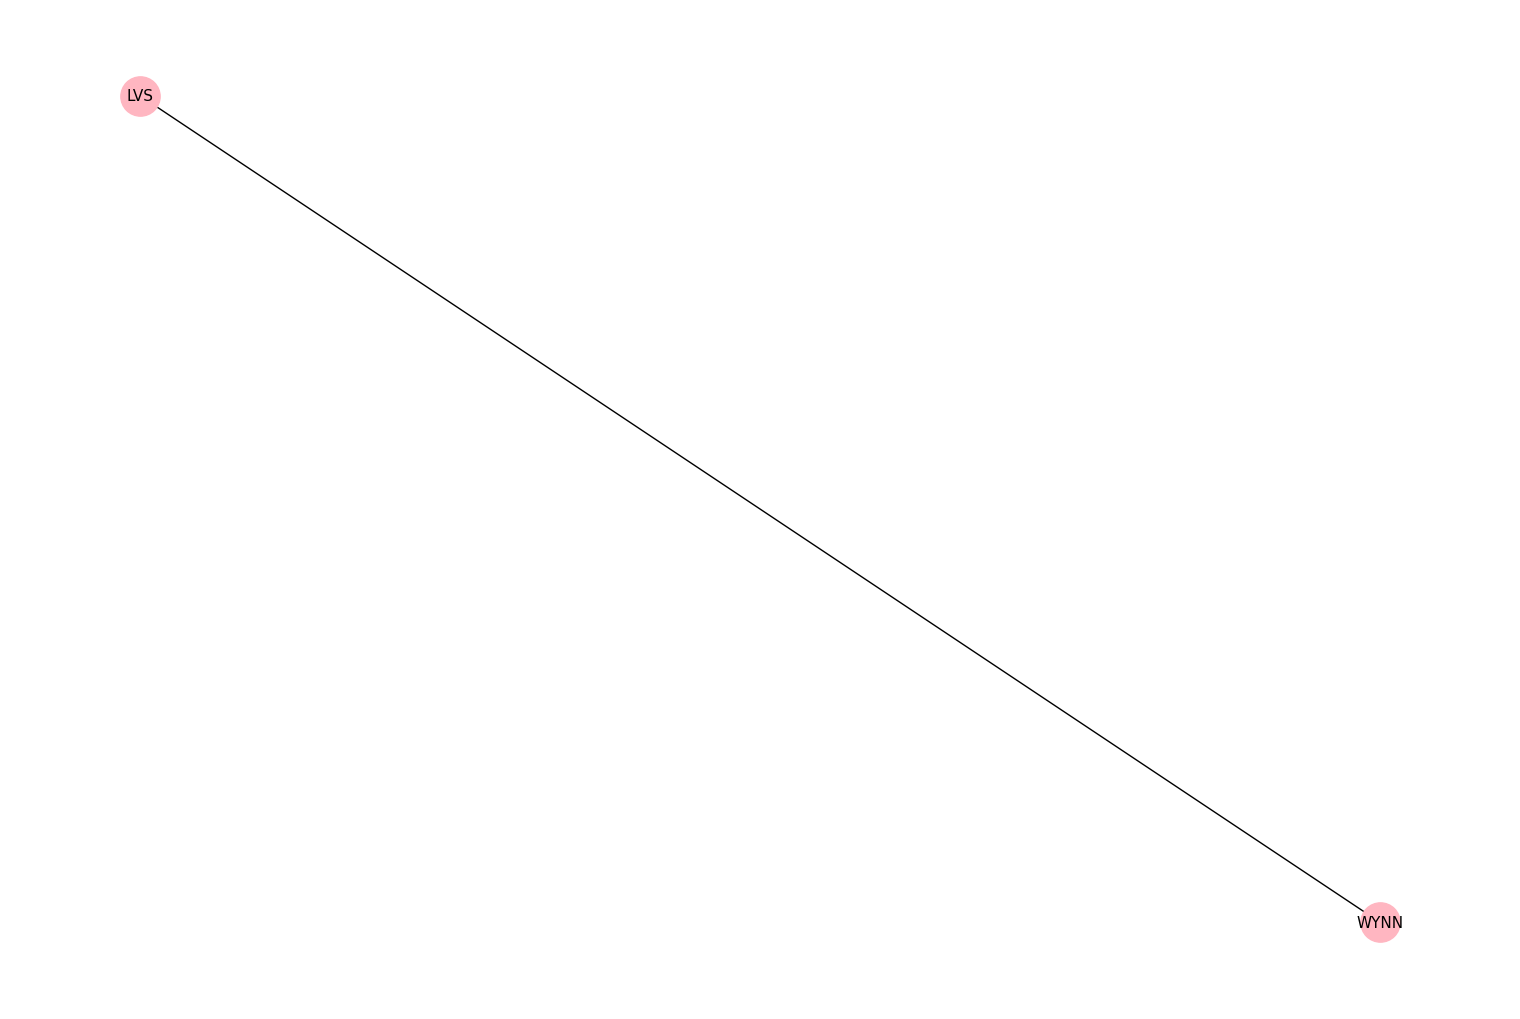

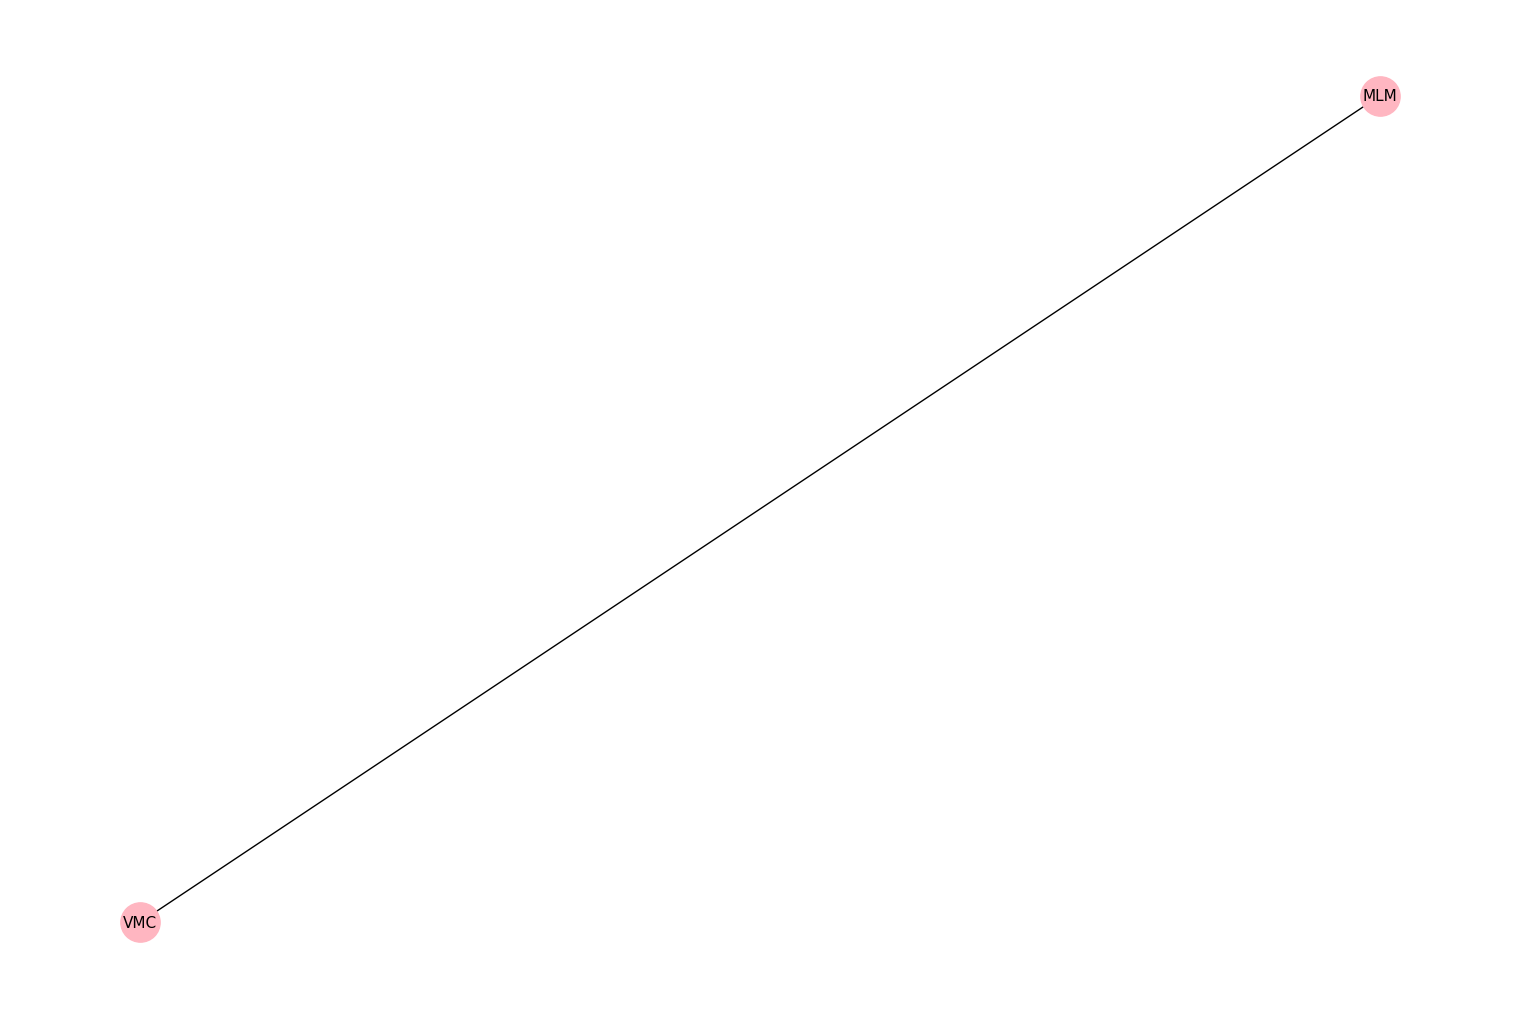

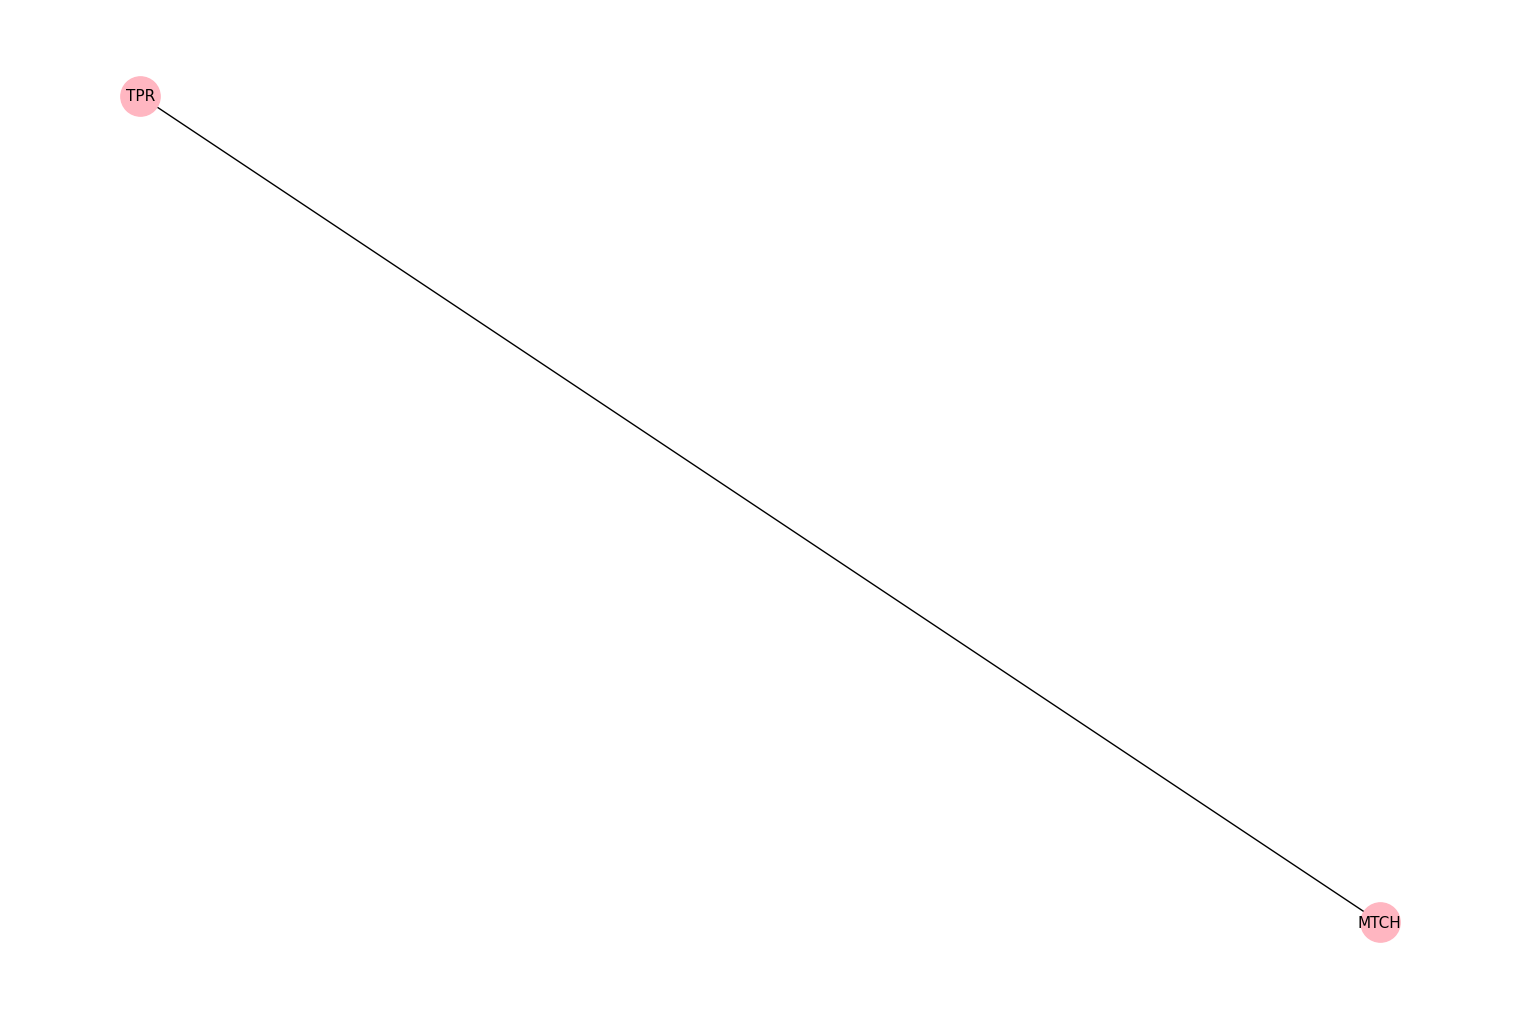

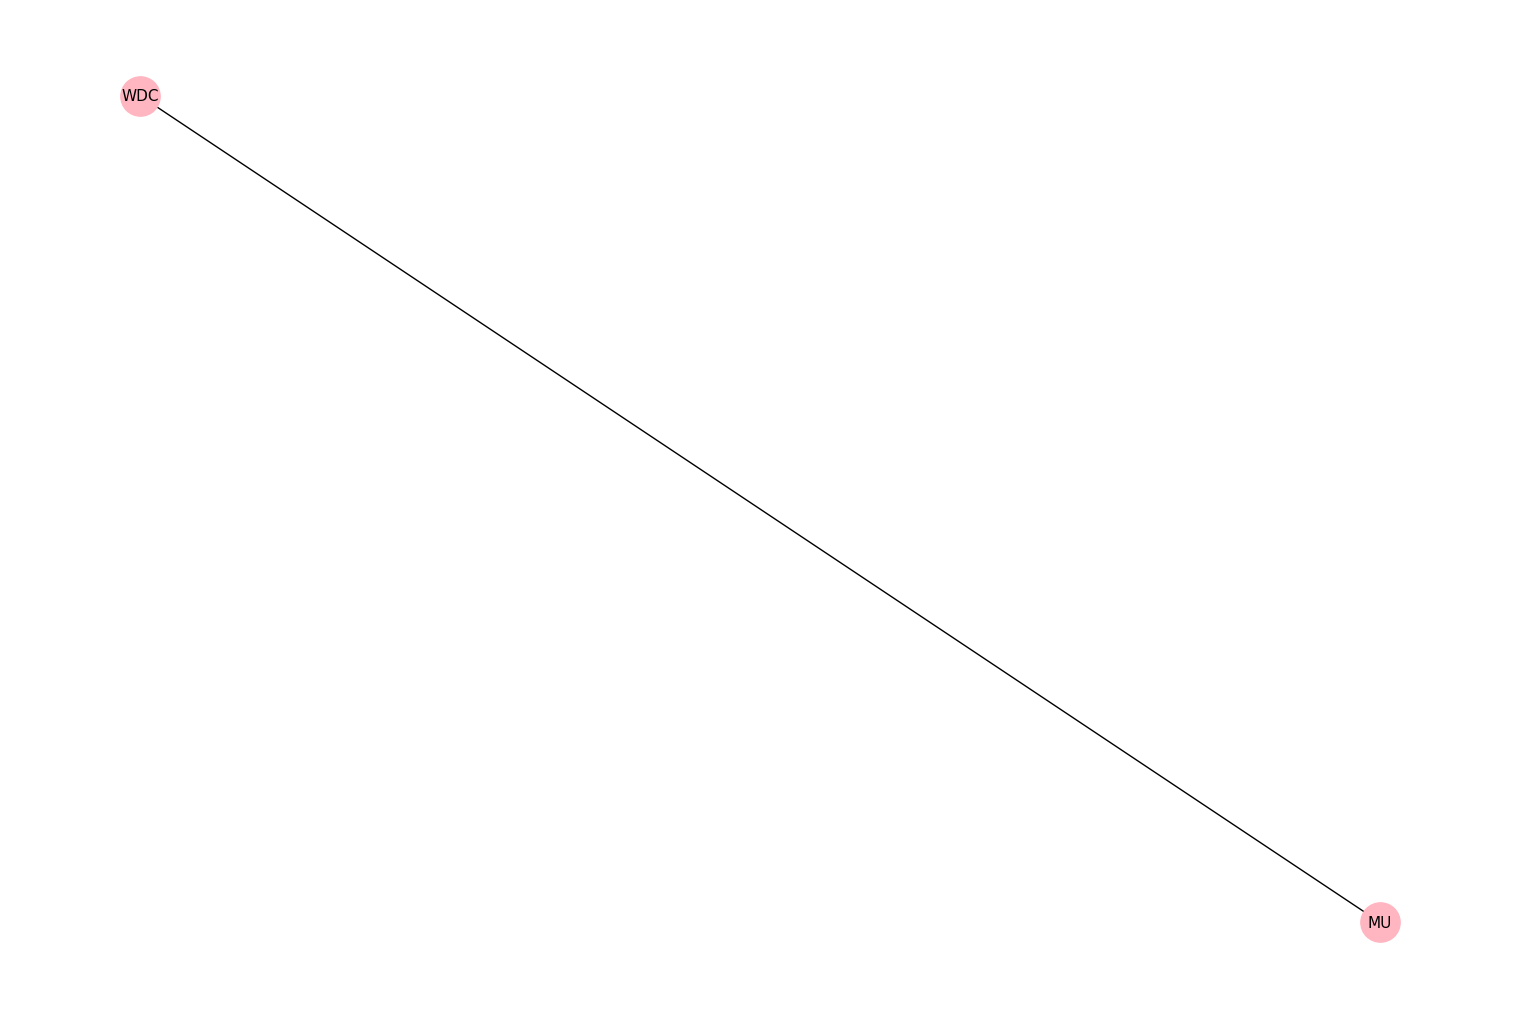

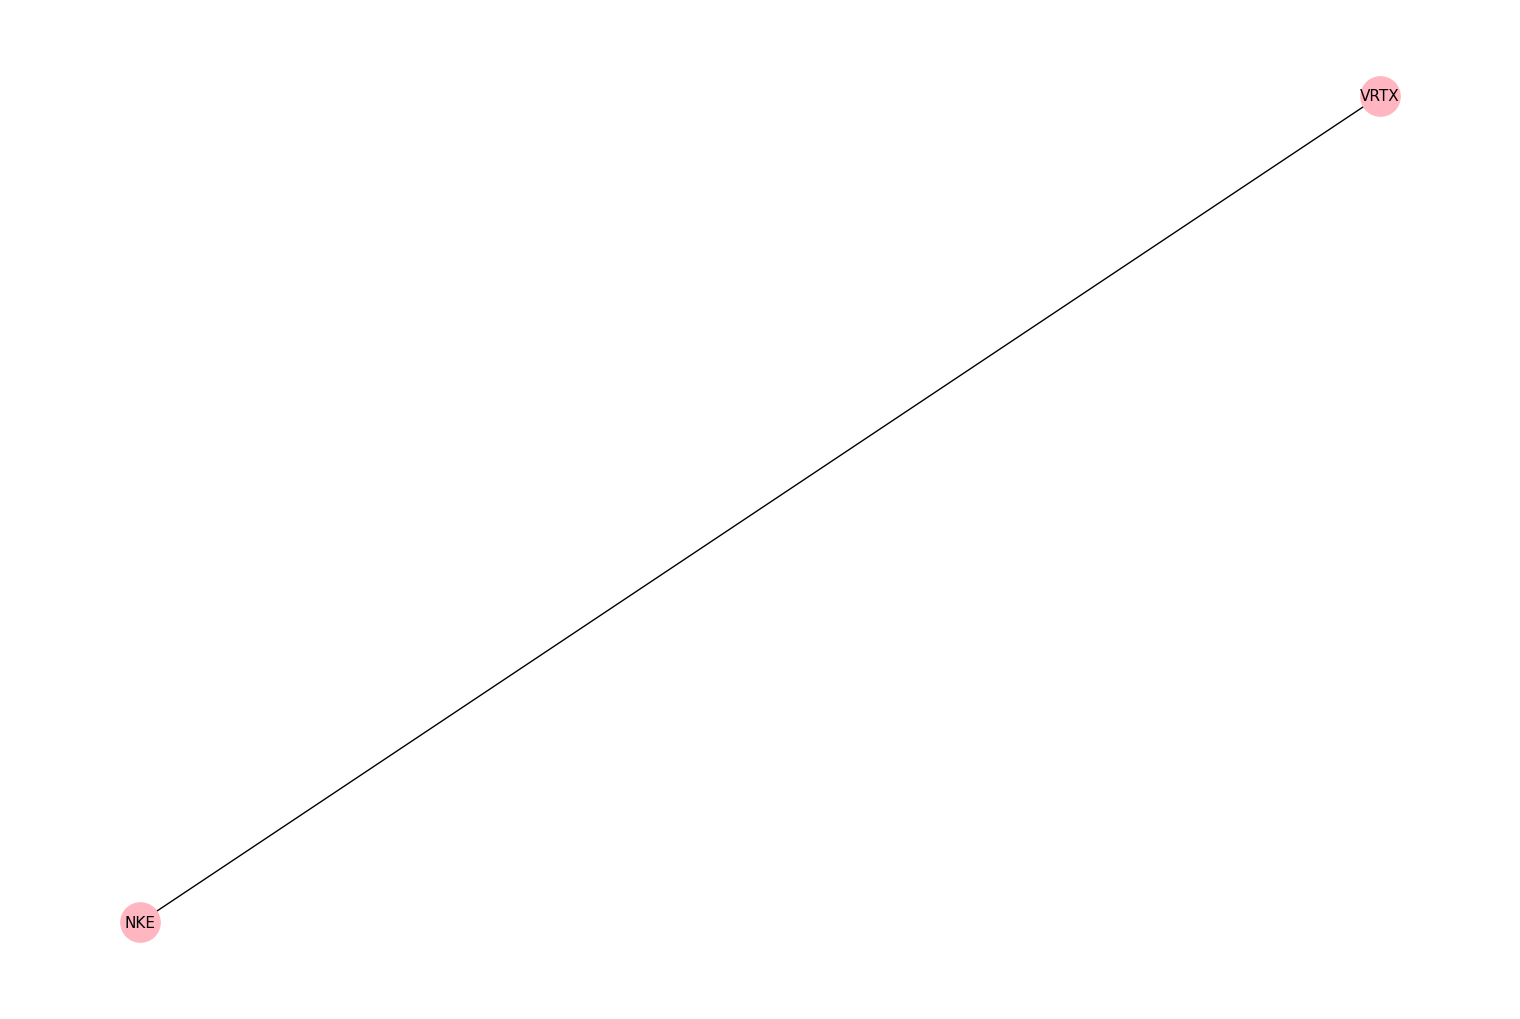

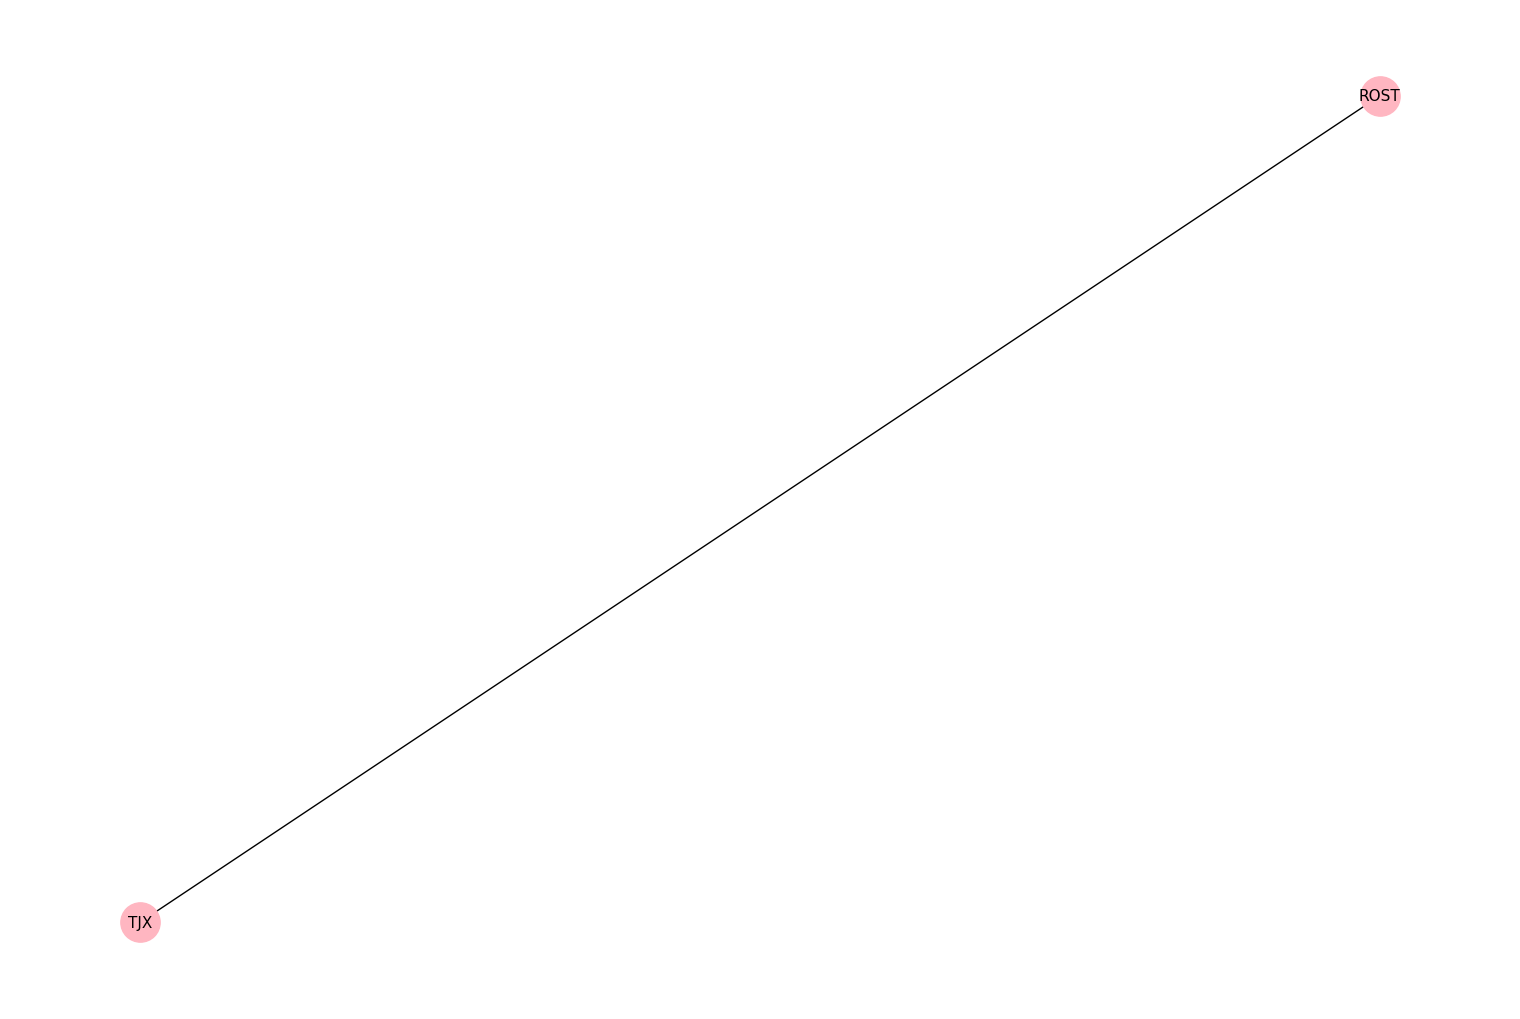

In [35]:
# Show the subgraphs (disconnected components) of the network
connected_components = list(nx.connected_components(G))
print('Number of components:', len(connected_components))

subgraphs = [G.subgraph(c).copy() for c in connected_components]

for sub_graph in subgraphs:
    nx.draw(sub_graph, with_labels=True,node_color ="lightpink", node_size=800, edge_color='black',linewidths=1,font_size=11)
    plt.show()


In [ ]:
# TODO: # Create bar chart aggregating companies by industry